In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import (jarque_bera,zscore)
from tabulate import tabulate as tab
import warnings
warnings.filterwarnings("ignore")
import My_Func as mf
pd.set_option('display.float_format', '{:.3f}'.format)

## Import Data From Excel File

In [2]:
path="G:/My Drive/IMPACT OF MSMEs IN ECONOMIC DEVLOPMENT OF INDIA M.Sc. Project/Downloaded Data/EDA OF MSMEs OF INDIA.xlsx"
MSME_Performance1=mf.XLST_DT(path,0) # The Performance like Number_Entp.,Employment,Population,Gross_Output from 2000-01 FY to 2021-2022 FY
MSME_Performance2=mf.XLST_DT(path,1) # Year Wise Y_India_GDP_in_US_Dollars,Market Value of Fixed Assets in Dollars (investments),India’s Total Export (in crore),Share of MSMEs in total Export in Dollars & MSME_GDP_In_US_DOLLARS
Year_wise_MSME=mf.XLST_DT(path,2) # Year wise MSMEs Micro, Small and Medium Enterprises from 2007-08 FY to 2021-22 FY
Dist_wise_Manu_Serv=mf.XLST_DT(path,3) # District wise MSMEs in Service and Manufacturing Sectors.
State_wise_male_Female=mf.XLST_DT(path,4) #State wise Distribution of Number of MSMEs,Employeement & Proprietary of MSMEs by Male and Female 201-2016 FY
MSME_4TH_CENSUS=mf.XLST_DT(path,5) # Results of 4th MSME Census
#MSME_SAMB_DATA=mf.XLST_DT(path,6) # MSME Sambandh Data from 2018-19 FY to 2022-23 FY
#Working_Closed_MSME_21=mf.XLST_DT(path,7) # Working and closed enter prises in year 2021

## EDA , Cleaning & Edit.

### Work For MSME_Performance1 (2000-01 FY to 2021-22 FY)

In [3]:
MSME_Performance1.rename(columns={'Number_Entp.':'Number_Entp'},inplace=True)
print(MSME_Performance1.head(22))

         Year  Number_Entp  Employment  IND_Population  Gross_Output
0   2000-2001      101.100     238.700       10596.337      2612.970
1   2001-2002      105.200     249.300       10789.709      2822.700
2   2002-2003      109.500     260.200       10983.130      3148.500
3   2003-2004      114.000     271.400       11174.151      3645.470
4   2004-2005      118.600     282.600       11362.646      4297.960
5   2005-2006      123.400     294.900       11546.387      4978.420
6   2006-2007      361.760     805.230       11723.738     11988.180
7   2007-2008      377.370     842.230       11896.918     13227.770
8   2008-2009      393.700     881.140       12067.348     13755.890
9   2009-2010      410.820     922.190       12236.402     14883.520
10  2010-2011      428.770     965.690       12406.136     16536.220
11  2011-2012      447.730    1012.590       12576.212     17885.840
12  2012-2013      467.540    1061.400       12744.872     18099.760
13  2013-2014      488.460    1114

In [4]:
MSME_Performance1['Annual_Growth_rate_Entp']=(((MSME_Performance1['Number_Entp']-MSME_Performance1['Number_Entp'].shift(1))/
                                              MSME_Performance1['Number_Entp'].shift(1))*100).fillna(0)
MSME_Performance1['Annual_Growth_rate_Employment']=(((MSME_Performance1['Employment']-MSME_Performance1['Employment'].shift(1))/
                                                    MSME_Performance1['Employment'].shift(1))*100).fillna(0)
MSME_Performance1['Annual_Growth_rate_GO']=(((MSME_Performance1['Gross_Output']-MSME_Performance1['Gross_Output'].shift(1))/
                                             MSME_Performance1['Gross_Output'].shift(1))*100).fillna(0)
Cagr=[]
for i in range(1,5):
    Periods=MSME_Performance1.iloc[:,i].count()
    Cagr.append(((MSME_Performance1.iloc[:,i][Periods-1]/MSME_Performance1.iloc[:,i][0])**(1/Periods)-1)*100);
DT=pd.DataFrame({'MSME_DATA':MSME_Performance1.columns[1:5],'CAGR_VALUES':Cagr})
CAGR=DT.sort_values(by='CAGR_VALUES', ascending=False)
print(CAGR)
print("="*45)
Correlation_Entp_Emp=MSME_Performance1.iloc[:,1].corr(MSME_Performance1.iloc[:,2])
Correlation_Entp_GO=MSME_Performance1.iloc[:,1].corr(MSME_Performance1.iloc[:,4])

print('Correlation_Entp_GO = ',Correlation_Entp_GO)
print('Correlation_Entp_Emp = ',Correlation_Entp_Emp)
print("="*45)
MSME_Performance1['Share_of_msme_employment_in_Ind_Population']=(MSME_Performance1.iloc[:,2]/MSME_Performance1.iloc[:,3])*100
print(MSME_Performance1.head(22))

        MSME_DATA  CAGR_VALUES
3    Gross_Output       12.372
0     Number_Entp        9.776
1      Employment        8.416
2  IND_Population        1.299
Correlation_Entp_GO =  0.9704314704468517
Correlation_Entp_Emp =  0.9782289901284631
         Year  Number_Entp  Employment  IND_Population  Gross_Output  \
0   2000-2001      101.100     238.700       10596.337      2612.970   
1   2001-2002      105.200     249.300       10789.709      2822.700   
2   2002-2003      109.500     260.200       10983.130      3148.500   
3   2003-2004      114.000     271.400       11174.151      3645.470   
4   2004-2005      118.600     282.600       11362.646      4297.960   
5   2005-2006      123.400     294.900       11546.387      4978.420   
6   2006-2007      361.760     805.230       11723.738     11988.180   
7   2007-2008      377.370     842.230       11896.918     13227.770   
8   2008-2009      393.700     881.140       12067.348     13755.890   
9   2009-2010      410.820     922.190  

#### Ploting for Number of Enterprises in MSMEs Year wise

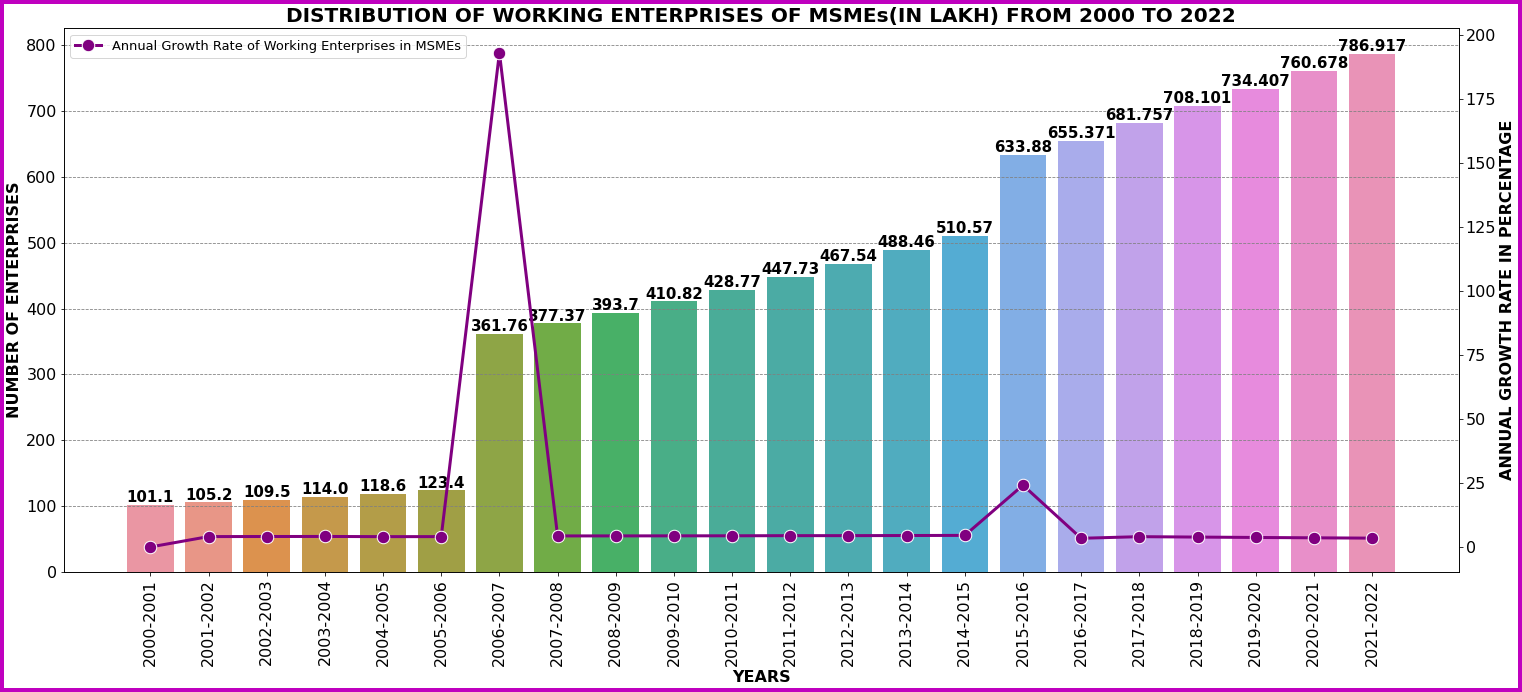

In [5]:
figure,ax1=plt.subplots(figsize=(25,10),facecolor='w', edgecolor='m',linewidth=8)
plt.grid(True, color='gray', linestyle='--', linewidth=0.8,zorder=0)

sns.barplot(x=MSME_Performance1['Year'],y=MSME_Performance1['Number_Entp'],ax=ax1)
for i, v in enumerate(round(MSME_Performance1['Number_Entp'],3)):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=15,color='k')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("YEARS",fontsize=16,fontweight='bold')
plt.ylabel("NUMBER OF ENTERPRISES",fontsize=16,fontweight='bold')
plt.title('DISTRIBUTION OF WORKING ENTERPRISES OF MSMEs(IN LAKH) FROM 2000 TO 2022',fontweight='bold', fontsize=20,color='k')

ax2=ax1.twinx()
ax2.plot(MSME_Performance1['Year'],MSME_Performance1['Annual_Growth_rate_Entp'],c='purple',marker='.', 
         linewidth=3, markersize=25,markeredgecolor='w',markeredgewidth=1,label='Annual Growth Rate of Working Enterprises in MSMEs')
ax2.set_ylabel('ANNUAL GROWTH RATE IN PERCENTAGE',fontsize=16,fontweight='bold',c='k')
ax2.tick_params(axis='y',labelsize=16)

    
plt.legend(fontsize=13,loc='upper left')
plt.show()

#### Ploting for Number of Employments in MSMEs Year wise

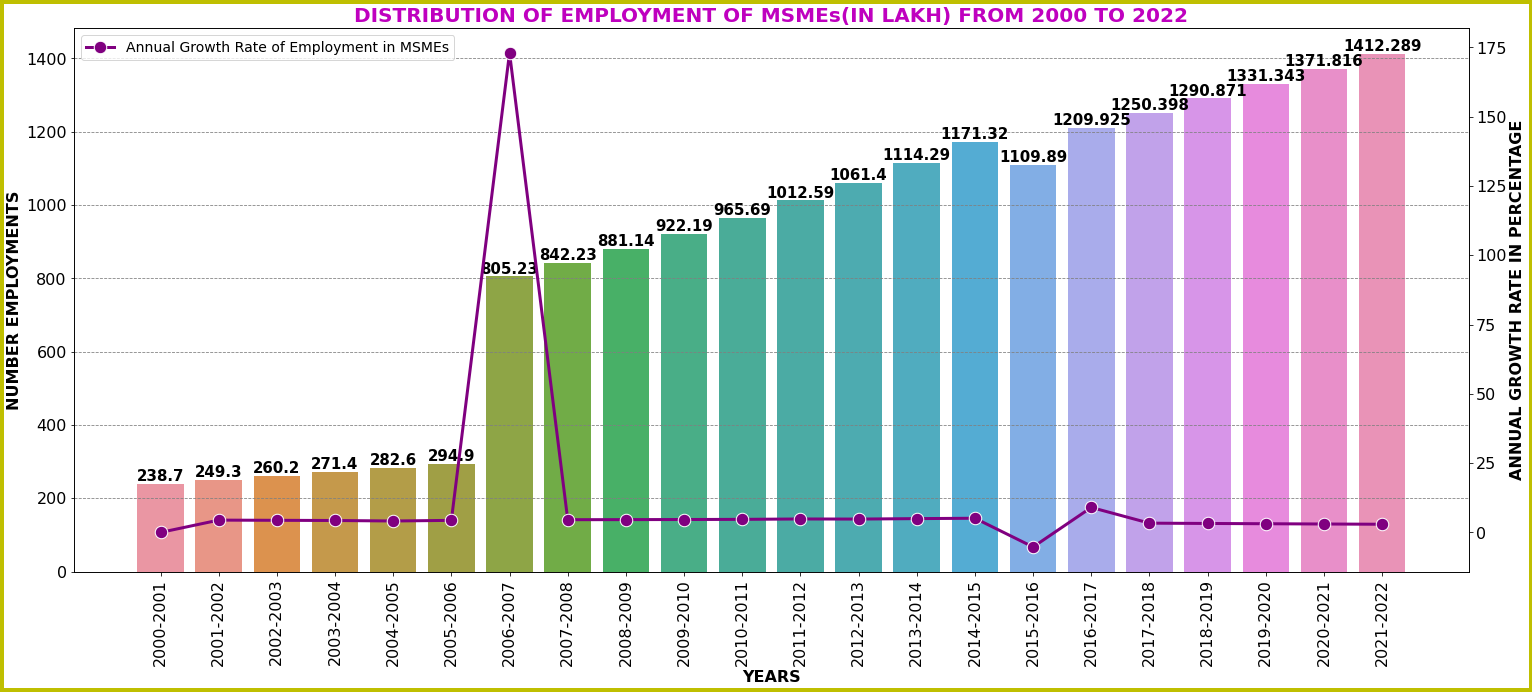

In [6]:
figure,ax1=plt.subplots(figsize=(25,10),facecolor='w', edgecolor='y',linewidth=8)
plt.grid(True, color='gray', linestyle='--', linewidth=0.8,zorder=0)

sns.barplot(x=MSME_Performance1['Year'],y=MSME_Performance1['Employment'],ax=ax1)
for i, v in enumerate(round(MSME_Performance1['Employment'],3)):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=15,color='k')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("YEARS",fontsize=16,fontweight='bold')
plt.ylabel("NUMBER EMPLOYMENTS",fontsize=16,fontweight='bold')
plt.title('DISTRIBUTION OF EMPLOYMENT OF MSMEs(IN LAKH) FROM 2000 TO 2022',fontweight='bold', fontsize=20,color='m')

ax2=ax1.twinx()
ax2.plot(MSME_Performance1['Year'],MSME_Performance1['Annual_Growth_rate_Employment'],c='purple',marker='.', 
         linewidth=3, markersize=25,markeredgecolor='w',markeredgewidth=1,label='Annual Growth Rate of Employment in MSMEs')
ax2.set_ylabel('ANNUAL GROWTH RATE IN PERCENTAGE',fontsize=16,fontweight='bold',c='k')
ax2.tick_params(axis='y',labelsize=16)

plt.legend(fontsize=14,loc='upper left') 
plt.show()

#### Ploting for Gross Output in MSMEs Year wise

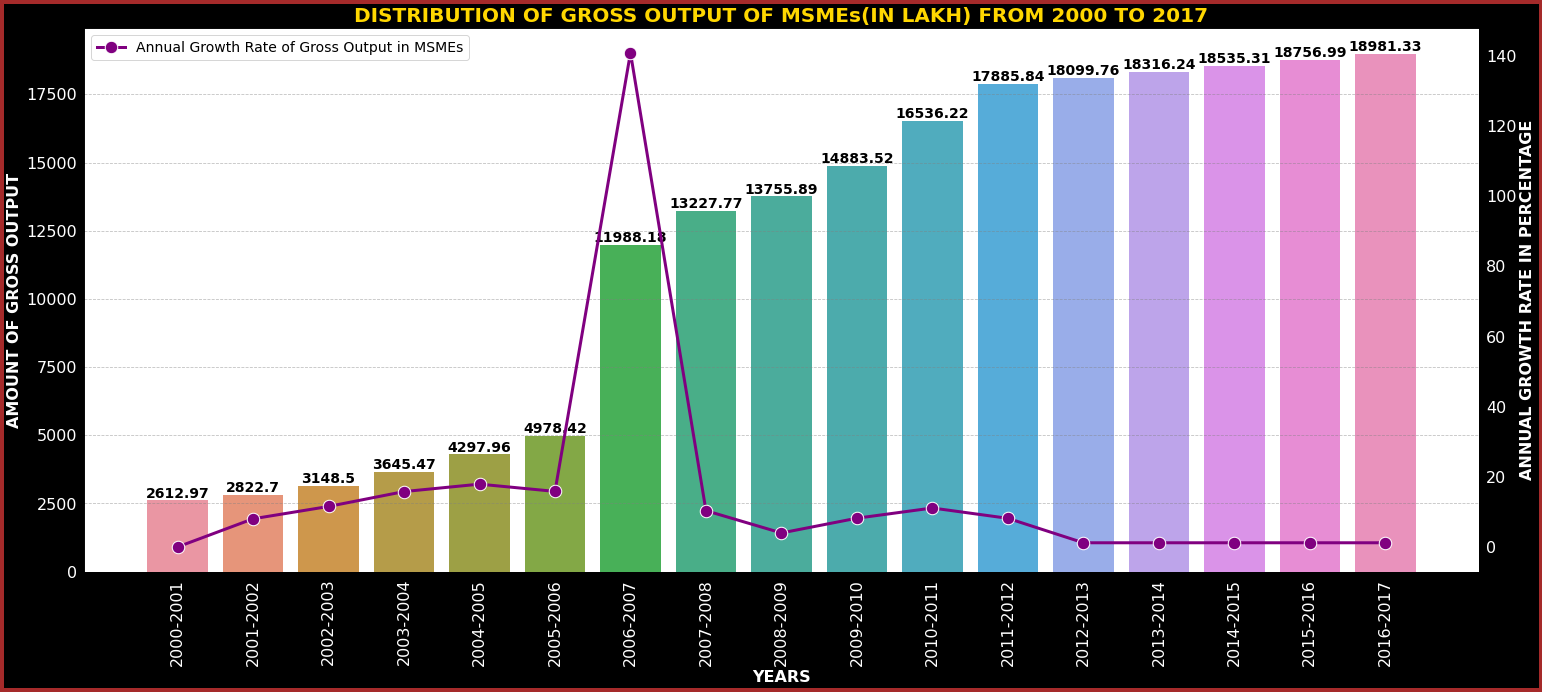

In [7]:
figure,ax1=plt.subplots(figsize=(25,10),facecolor='k', edgecolor='brown',linewidth=8)
plt.grid(True, color='gray', linestyle='--', linewidth=0.8,alpha=0.5)

sns.barplot(x=MSME_Performance1['Year'][0:17],y=MSME_Performance1['Gross_Output'][0:17],ax=ax1)
for i, v in enumerate(round(MSME_Performance1['Gross_Output'][0:17],3)):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=14,color='k')
plt.xticks(rotation=90,fontsize=16,c='w')
plt.yticks(fontsize=16,c='w')
plt.xlabel("YEARS",fontsize=16,fontweight='bold',c='w')
plt.ylabel("AMOUNT OF GROSS OUTPUT",fontsize=16,fontweight='bold',c='w')
plt.title('DISTRIBUTION OF GROSS OUTPUT OF MSMEs(IN LAKH) FROM 2000 TO 2017',fontweight='bold', fontsize=20,color='gold')

ax2=ax1.twinx()
ax2.plot(MSME_Performance1['Year'][0:17],MSME_Performance1['Annual_Growth_rate_GO'][0:17],c='purple',marker='.'
         , linewidth=3, markersize=25,markeredgecolor='w',markeredgewidth=1,label='Annual Growth Rate of Gross Output in MSMEs')
ax2.set_ylabel('ANNUAL GROWTH RATE IN PERCENTAGE',fontsize=16,fontweight='bold',c='w')
ax2.tick_params(axis='y',labelsize=16,labelcolor='w')
    
plt.legend(fontsize=14,loc='upper left')    
plt.show()

#### Ploting for Share of MSMEs Employment in India Total Population in Percent  Year wise

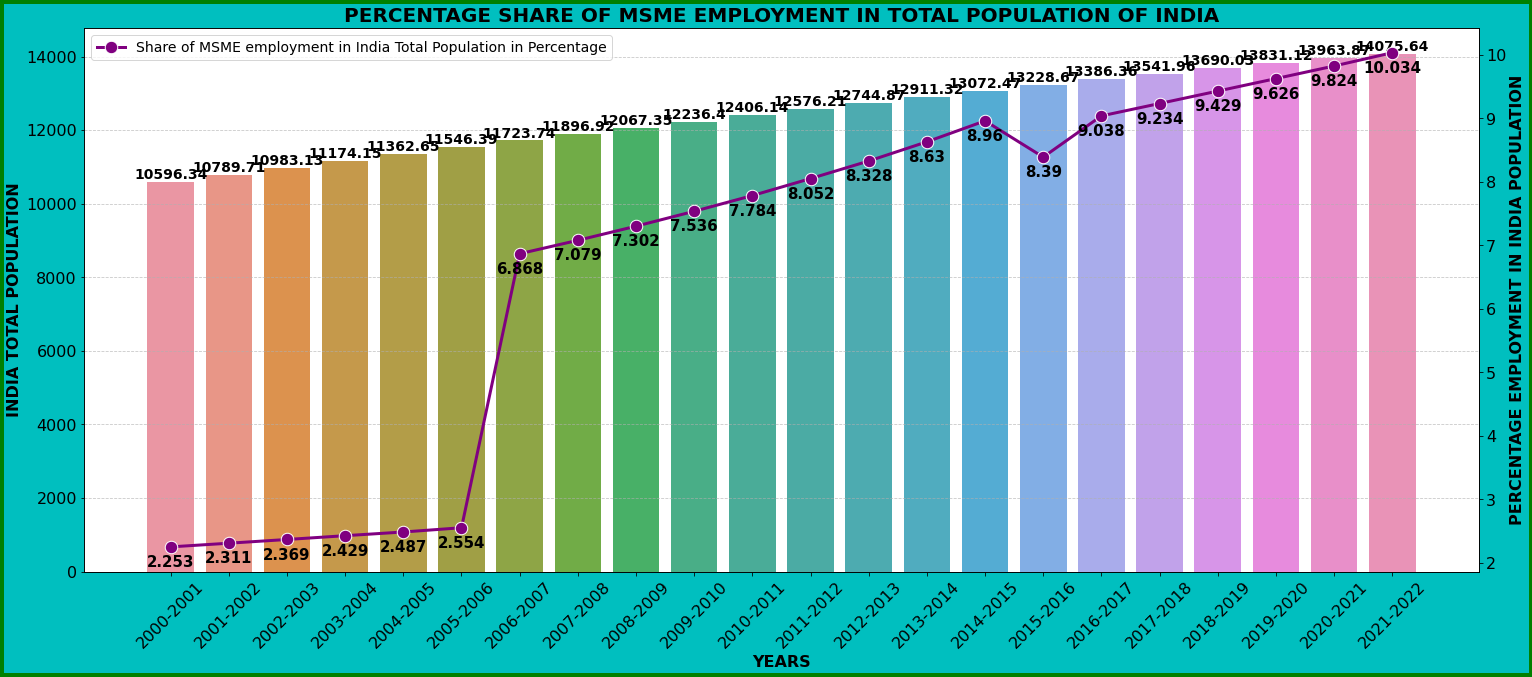

In [8]:
fig, ax1 = plt.subplots(figsize=(25,10),facecolor='c', edgecolor='g',linewidth=8)
plt.grid(True, linestyle='--', alpha=0.7)

sns.barplot(x=MSME_Performance1['Year'],y=MSME_Performance1['IND_Population'],ax=ax1)
for i, v in enumerate(round(MSME_Performance1['IND_Population'],2)):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=14,color='k')
plt.xticks(rotation=45,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("YEARS",fontsize=16,fontweight='bold')
plt.ylabel("INDIA TOTAL POPULATION",fontsize=16,fontweight='bold')
plt.title('PERCENTAGE SHARE OF MSME EMPLOYMENT IN TOTAL POPULATION OF INDIA',fontweight='bold', fontsize=20,color='k')

ax2=ax1.twinx()
ax2.plot(MSME_Performance1['Year'],MSME_Performance1['Share_of_msme_employment_in_Ind_Population'],c='purple',marker='.'
         , linewidth=3, markersize=25,markeredgecolor='w',markeredgewidth=1,label='Share of MSME employment in India Total Population in Percentage')
for i, v in enumerate(round(MSME_Performance1['Share_of_msme_employment_in_Ind_Population'],3)):
    plt.annotate(str(v), xy=(i, v-.125), ha='center', va='top',fontweight='bold', fontsize=15,color='k')
ax2.set_ylabel('PERCENTAGE EMPLOYMENT IN INDIA POPULATION',fontsize=16,fontweight='bold')
ax2.tick_params(axis='y', labelsize=16)
    
plt.legend(fontsize=14)    
plt.show()

#### Ploting for CAGR Values of MSME Variables in Percent.

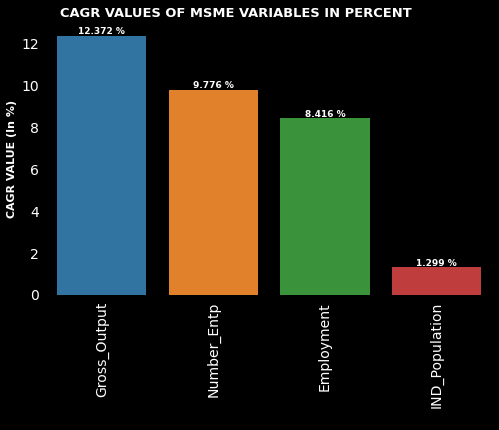

In [9]:
plt.figure(figsize=(8,5),facecolor='k')
ax = plt.gca(facecolor='k')
plt.xticks(c='w',rotation=90,fontsize=14)
plt.yticks(c='w',fontsize=14)
K=sns.barplot(x=CAGR['MSME_DATA'],y=CAGR['CAGR_VALUES'])
for i,v in enumerate(round(CAGR['CAGR_VALUES'],3)):
    plt.annotate(str(v)+' %',xy=(i,v), ha='center', va='bottom',fontweight='bold', fontsize=9,color='w')
plt.ylabel('CAGR VALUE (In %)',fontsize=11,fontweight='bold',c='w')
plt.title('CAGR VALUES OF MSME VARIABLES IN PERCENT               ',fontsize=13,fontweight='bold',c='w',loc='center')

plt.show()

### Work For MSME_Performance2 (2000-01 FY to 2021-22 FY)

In [10]:
MSME_Performance2.rename(columns={'Market_Value_of_Fixed_Assets_in_Dollars':'MSME_Investment_in_Dollars','Share_of_MSMEs_in_total_Export_in_Dollars_':'MSME_Export_in_Dollars'},inplace=True)
print(MSME_Performance2.head(30))

         Year  India_GDP_in_US_Dollars  MSME_Investment_in_Dollars  \
0   2006-2007                 1216.735                   19168.921   
1   2007-2008                 1198.896                   22187.121   
2   2008-2009                 1341.887                   22326.074   
3   2009-2010                 1675.615                   21262.786   
4   2010-2011                 1823.050                   23942.563   
5   2011-2012                 1827.638                   25218.328   
6   2012-2013                 1856.722                   23741.835   
7   2013-2014                 2039.127                   24106.426   
8   2014-2015                 2103.588                   23614.839   
9   2015-2016                 2294.798                   24511.530   
10  2016-2017                 2651.473                   24424.815   
11  2017-2018                 2702.930                   25071.705   
12  2018-2019                 2831.552                   25338.117   
13  2019-2020       

In [11]:
MSME_Performance2['Annual_Growth_rate_MSME_Investment']=(((MSME_Performance2['MSME_Investment_in_Dollars']-MSME_Performance2['MSME_Investment_in_Dollars'].shift(1))/
                                              MSME_Performance2['MSME_Investment_in_Dollars'].shift(1))*100).fillna(0)
MSME_Performance2['Annual_Growth_rate_MSME_Export']=(((MSME_Performance2['MSME_Export_in_Dollars']-MSME_Performance2['MSME_Export_in_Dollars'].shift(1))/
                                                    MSME_Performance2['MSME_Export_in_Dollars'].shift(1))*100).fillna(0)
MSME_Performance2['Annual_Growth_rate_MSME_GDP']=(((MSME_Performance2['MSME_GDP_IN_US_DOLLARS']-MSME_Performance2['MSME_GDP_IN_US_DOLLARS'].shift(1))/
                                             MSME_Performance2['MSME_GDP_IN_US_DOLLARS'].shift(1))*100).fillna(0)
print(MSME_Performance2)

         Year  India_GDP_in_US_Dollars  MSME_Investment_in_Dollars  \
0   2006-2007                 1216.735                   19168.921   
1   2007-2008                 1198.896                   22187.121   
2   2008-2009                 1341.887                   22326.074   
3   2009-2010                 1675.615                   21262.786   
4   2010-2011                 1823.050                   23942.563   
5   2011-2012                 1827.638                   25218.328   
6   2012-2013                 1856.722                   23741.835   
7   2013-2014                 2039.127                   24106.426   
8   2014-2015                 2103.588                   23614.839   
9   2015-2016                 2294.798                   24511.530   
10  2016-2017                 2651.473                   24424.815   
11  2017-2018                 2702.930                   25071.705   
12  2018-2019                 2831.552                   25338.117   
13  2019-2020       

#### Ploting for Share of MSMEs Investment Year wise

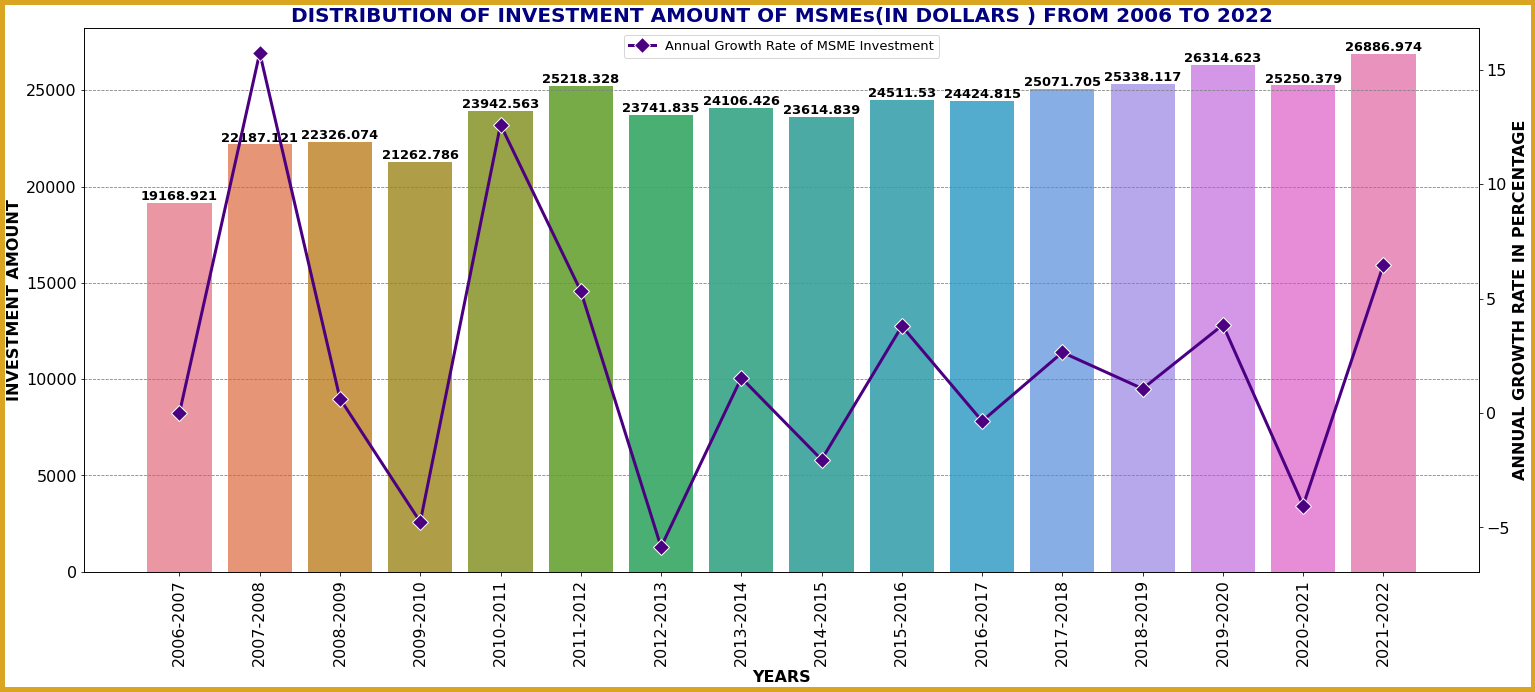

In [12]:
figure,ax1=plt.subplots(figsize=(25,10),facecolor='w', edgecolor='goldenrod',linewidth=10)
plt.grid(True, color='gray', linestyle='--', linewidth=0.8,zorder=0)

sns.barplot(x=MSME_Performance2['Year'],y=MSME_Performance2['MSME_Investment_in_Dollars'],ax=ax1)
for i, v in enumerate(round(MSME_Performance2['MSME_Investment_in_Dollars'],3)):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=13,color='k')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("YEARS",fontsize=16,fontweight='bold')
plt.ylabel("INVESTMENT AMOUNT",fontsize=16,fontweight='bold')
plt.title('DISTRIBUTION OF INVESTMENT AMOUNT OF MSMEs(IN DOLLARS ) FROM 2006 TO 2022',fontweight='bold', fontsize=20,color='navy')

ax2=ax1.twinx()
ax2.plot(MSME_Performance2['Year'],MSME_Performance2['Annual_Growth_rate_MSME_Investment'],c='indigo',marker='D', 
         linewidth=3, markersize=12,markeredgecolor='w',markeredgewidth=1,label='Annual Growth Rate of MSME Investment')
ax2.set_ylabel('ANNUAL GROWTH RATE IN PERCENTAGE',fontsize=16,fontweight='bold',c='k')
ax2.tick_params(axis='y',labelsize=16)

    
plt.legend(fontsize=13,loc='upper center')
plt.show()

#### Ploting for Share of MSMEs Export Year wise

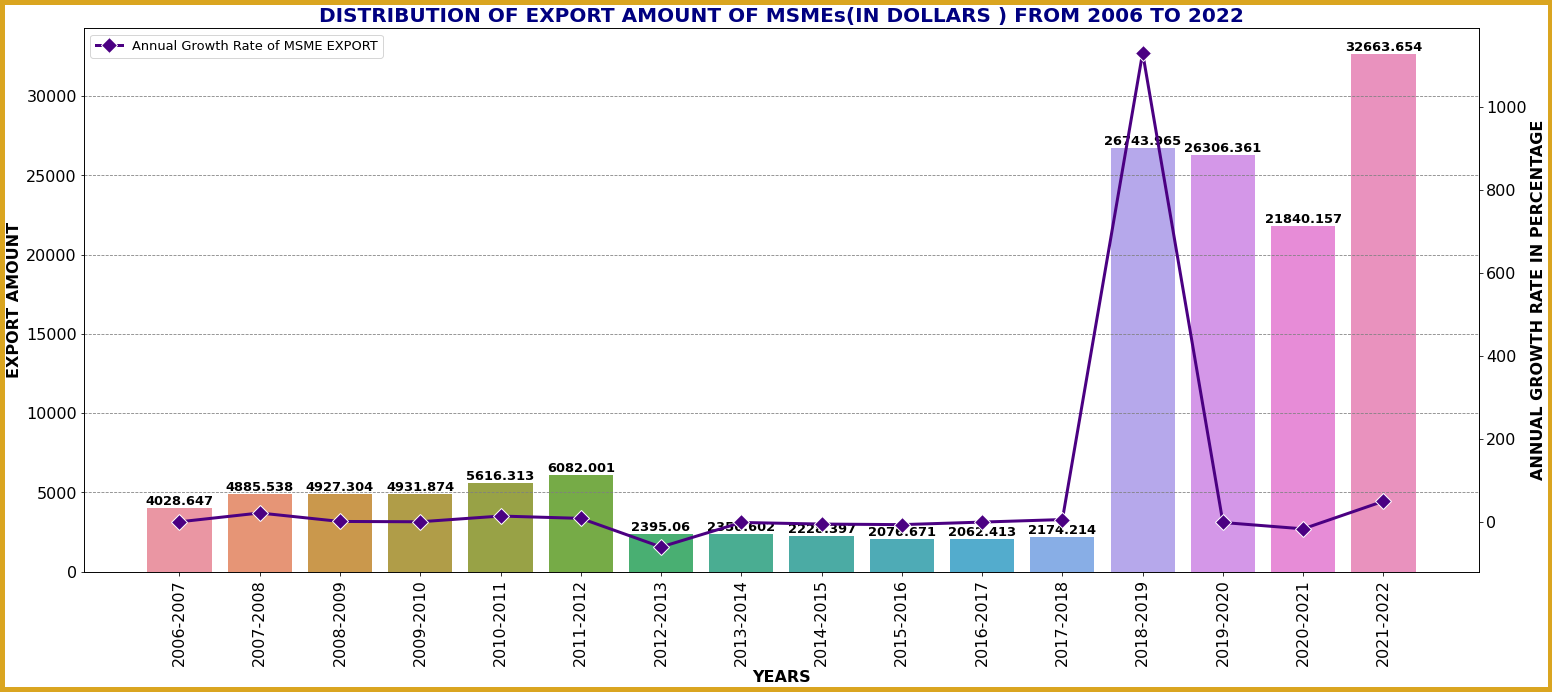

In [13]:
figure,ax1=plt.subplots(figsize=(25,10),facecolor='w', edgecolor='goldenrod',linewidth=10)
plt.grid(True, color='gray', linestyle='--', linewidth=0.8,zorder=0)

sns.barplot(x=MSME_Performance2['Year'],y=MSME_Performance2['MSME_Export_in_Dollars'],ax=ax1)
for i, v in enumerate(round(MSME_Performance2['MSME_Export_in_Dollars'],3)):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=13,color='k')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("YEARS",fontsize=16,fontweight='bold')
plt.ylabel("EXPORT AMOUNT",fontsize=16,fontweight='bold')
plt.title('DISTRIBUTION OF EXPORT AMOUNT OF MSMEs(IN DOLLARS ) FROM 2006 TO 2022',fontweight='bold', fontsize=20,color='navy')

ax2=ax1.twinx()
ax2.plot(MSME_Performance2['Year'],MSME_Performance2['Annual_Growth_rate_MSME_Export'],c='indigo',marker='D', 
         linewidth=3, markersize=12,markeredgecolor='w',markeredgewidth=1,label='Annual Growth Rate of MSME EXPORT')
ax2.set_ylabel('ANNUAL GROWTH RATE IN PERCENTAGE',fontsize=16,fontweight='bold',c='k')
ax2.tick_params(axis='y',labelsize=16)

    
plt.legend(fontsize=13,loc='upper left')
plt.show()

#### Ploting for Share of MSMEs GDP Year wise

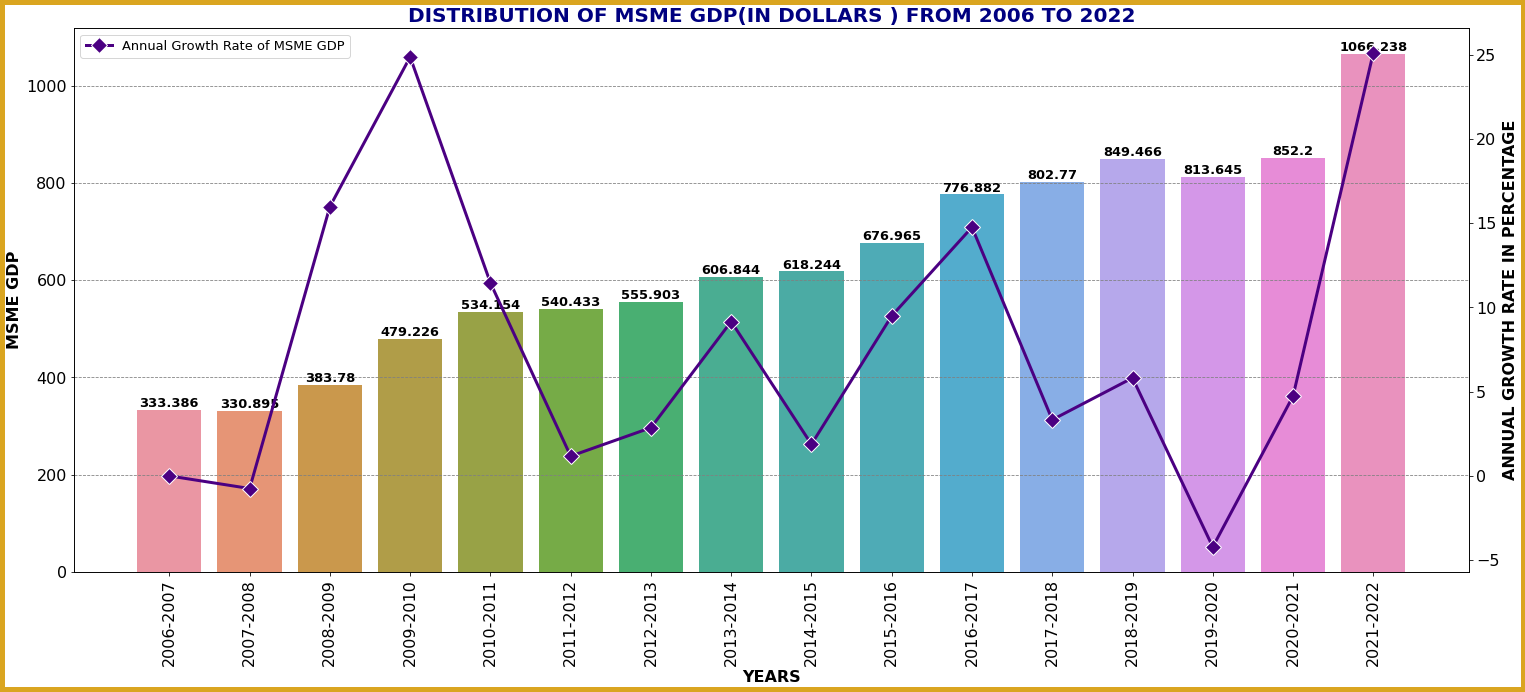

In [14]:
figure,ax1=plt.subplots(figsize=(25,10),facecolor='w', edgecolor='goldenrod',linewidth=10)
plt.grid(True, color='gray', linestyle='--', linewidth=0.8,zorder=0)

sns.barplot(x=MSME_Performance2['Year'],y=MSME_Performance2['MSME_GDP_IN_US_DOLLARS'],ax=ax1)
for i, v in enumerate(round(MSME_Performance2['MSME_GDP_IN_US_DOLLARS'],3)):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=13,color='k')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("YEARS",fontsize=16,fontweight='bold')
plt.ylabel("MSME GDP",fontsize=16,fontweight='bold')
plt.title('DISTRIBUTION OF MSME GDP(IN DOLLARS ) FROM 2006 TO 2022',fontweight='bold', fontsize=20,color='navy')

ax2=ax1.twinx()
ax2.plot(MSME_Performance2['Year'],MSME_Performance2['Annual_Growth_rate_MSME_GDP'],c='indigo',marker='D', 
         linewidth=3, markersize=12,markeredgecolor='w',markeredgewidth=1,label='Annual Growth Rate of MSME GDP')
ax2.set_ylabel('ANNUAL GROWTH RATE IN PERCENTAGE',fontsize=16,fontweight='bold',c='k')
ax2.tick_params(axis='y',labelsize=16)

    
plt.legend(fontsize=13,loc='best')
plt.show()

#### Ploting for INDIA'S GDP & MSMEs'S GDP  Year wise

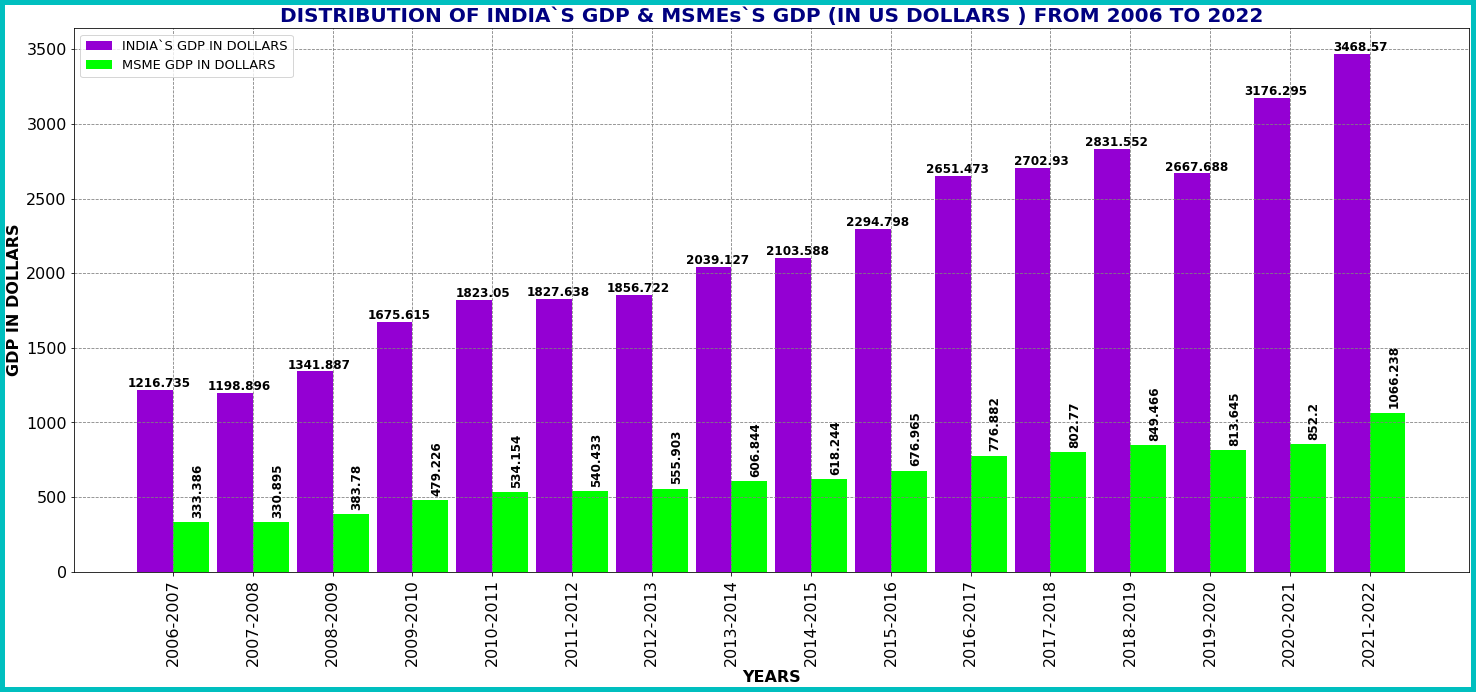

    SHARE OF MSME IN INDIA`S GDP
+----------+------------+----------+
|   SL.No. |   Measures |   Values |
+==========+============+==========+
|        0 |      count |       16 |
+----------+------------+----------+
|        1 |       mean |  29.1706 |
+----------+------------+----------+
|        2 |        std |  1.10209 |
+----------+------------+----------+
|        3 |        min |    26.83 |
+----------+------------+----------+
|        4 |        25% |     28.6 |
+----------+------------+----------+
|        5 |        50% |   29.445 |
+----------+------------+----------+
|        6 |        75% |   29.805 |
+----------+------------+----------+
|        7 |        max |    30.74 |
+----------+------------+----------+


In [15]:
plt.figure(figsize=(25,10),facecolor='w', edgecolor='c',linewidth=10)
plt.grid(True,color='gray', linestyle='--', linewidth=0.8,zorder=0)
w=0.45 #width of bar
X=np.arange(len(MSME_Performance2['Year']))
plt.xticks(X-w/2, MSME_Performance2['Year'],rotation=90,fontsize=16)
plt.yticks(fontsize=16)

plt.bar(X-w,MSME_Performance2['India_GDP_in_US_Dollars'],w,label='INDIA`S GDP IN DOLLARS',color='darkviolet')
for i, v in enumerate(round(MSME_Performance2['India_GDP_in_US_Dollars'],3)):
    plt.annotate(str(v), xy=(i, v), ha='right', va='bottom',fontweight='bold', fontsize=12,color='k')
    
plt.bar(X,MSME_Performance2['MSME_GDP_IN_US_DOLLARS'],w,label='MSME GDP IN DOLLARS',color='lime')
for i, v in enumerate(round(MSME_Performance2['MSME_GDP_IN_US_DOLLARS'],3)):
    plt.annotate(str(v), xy=(i, v+30), ha='left', va='bottom',fontweight='bold', fontsize=12,color='k',rotation=90)
    
plt.xlabel("YEARS",fontsize=16,fontweight='bold')
plt.ylabel("GDP IN DOLLARS",fontsize=16,fontweight='bold')
plt.title('DISTRIBUTION OF INDIA`S GDP & MSMEs`S GDP (IN US DOLLARS ) FROM 2006 TO 2022',fontweight='bold', fontsize=20,color='navy')

plt.legend(fontsize=13,loc='best')
plt.show()

#Share of MSME in India`s GDP
MSME_Share_in_GDP=[]
MSME_Share_in_Total_GDP = (MSME_Performance2['MSME_GDP_IN_US_DOLLARS'] / MSME_Performance2['India_GDP_in_US_Dollars']) * 100
Average_MSME_Share_in_Total_GDP=MSME_Share_in_Total_GDP.describe()
result_table = tab(Average_MSME_Share_in_Total_GDP.reset_index(), headers=('SL.No.','Measures','Values' ), tablefmt='grid', numalign='right', stralign='right')
print('    Share of MSME in India`s GDP\n'.upper()+result_table)

#### Ploting for INDIA'S EXPORT & MSMEs'S EXPORT  Year wise

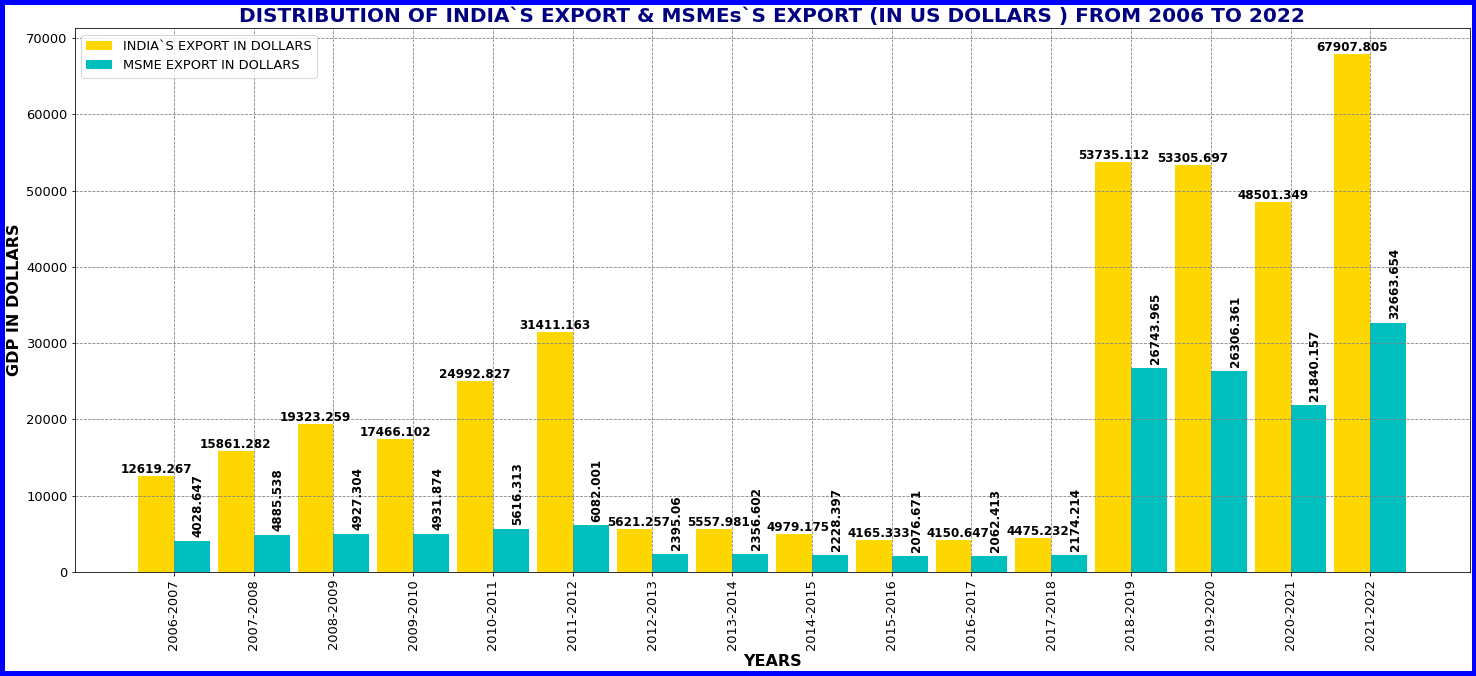

SHARE OF MSMEs IN INDIA`S TOTAL EXPORT
+----------+------------+----------+
|   SL.No. |   Measures |   Values |
+==========+============+==========+
|        0 |      count |       16 |
+----------+------------+----------+
|        1 |       mean |  39.2773 |
+----------+------------+----------+
|        2 |        std |   10.945 |
+----------+------------+----------+
|        3 |        min |  19.3625 |
+----------+------------+----------+
|        4 |        25% |  30.1605 |
+----------+------------+----------+
|        5 |        50% |  43.6808 |
+----------+------------+----------+
|        6 |        75% |   48.775 |
+----------+------------+----------+
|        7 |        max |  49.8561 |
+----------+------------+----------+


In [16]:
plt.figure(figsize=(25,10),facecolor='w', edgecolor='b',linewidth=10)
plt.grid(True,color='gray', linestyle='--', linewidth=0.8,zorder=0)
w=0.45 #width of bar
X=np.arange(len(MSME_Performance2['Year']))
plt.xticks(X-w/2, MSME_Performance2['Year'],rotation=90,fontsize=13)
plt.yticks(fontsize=13)

plt.bar(X-w,MSME_Performance2['India’s_Total_Export_in_Dollars'],w,label='INDIA`S EXPORT IN DOLLARS',color='gold')
for i, v in enumerate(round(MSME_Performance2['India’s_Total_Export_in_Dollars'],3)):
    plt.annotate(str(v), xy=(i, v), ha='right', va='bottom',fontweight='bold', fontsize=12,color='k')
    
plt.bar(X,MSME_Performance2['MSME_Export_in_Dollars'],w,label='MSME EXPORT IN DOLLARS',color='c')
for i, v in enumerate(round(MSME_Performance2['MSME_Export_in_Dollars'],3)):
    plt.annotate(str(v), xy=(i, v+500), ha='left', va='bottom',fontweight='bold', fontsize=12,color='k',rotation=90)
    
plt.xlabel("YEARS",fontsize=16,fontweight='bold')
plt.ylabel("GDP IN DOLLARS",fontsize=16,fontweight='bold')
plt.title('DISTRIBUTION OF INDIA`S EXPORT & MSMEs`S EXPORT (IN US DOLLARS ) FROM 2006 TO 2022',fontweight='bold', fontsize=20,color='navy')

plt.legend(fontsize=13,loc='best')
plt.show()

#SHARE OF MSMEs IN INDIA`S TOTAL EXPORT
MSME_Share_in_Exports=[]
MSME_Share_in_Total_Exports = (MSME_Performance2['MSME_Export_in_Dollars'] / MSME_Performance2['India’s_Total_Export_in_Dollars']) * 100
Average_MSME_Share_in_Total_Exports=MSME_Share_in_Total_Exports.describe()
result_table = tab(Average_MSME_Share_in_Total_Exports.reset_index(), headers=('SL.No.','Measures','Values' ), tablefmt='grid', numalign='right', stralign='right')
print('SHARE OF MSMEs IN INDIA`S TOTAL EXPORT\n'+result_table)

#### Detect the Outliers

In [17]:
# Calculate Z-scores for X outliers
z_scores_X = zscore(MSME_Performance2['MSME_GDP_IN_US_DOLLARS'])
X_outliers = (abs(z_scores_X) > 3)
# Calculate Z-scores for Y outliers
z_scores_Y = zscore(MSME_Performance2['India_GDP_in_US_Dollars'])
Y_outliers = (abs(z_scores_Y) > 3)
print("SL.No.",X_outliers.name,'\n',+X_outliers,"\n\nSL.No.",Y_outliers.name,'\n',Y_outliers)

SL.No. MSME_GDP_IN_US_DOLLARS 
 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
Name: MSME_GDP_IN_US_DOLLARS, dtype: bool 

SL.No. India_GDP_in_US_Dollars 
 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
Name: India_GDP_in_US_Dollars, dtype: bool


#### Test For Normality of variables

In [18]:
# Perform Jarque-Bera test
jb_test_x = jarque_bera(MSME_Performance2['MSME_GDP_IN_US_DOLLARS'])
print(f"Jarque-Bera Test for MSME GDP: Statistic={jb_test_x.statistic}, p-value={round(jb_test_x.pvalue,3)}")
if (jb_test_x.pvalue>0.05):
    print("So MSME GDP($) data is normal\n");
else:
    print("So MSME GDP($) data is non-normal\n")
        

jb_test_y = jarque_bera(MSME_Performance2['India_GDP_in_US_Dollars'])
print(f"Jarque-Bera Test for MSME GDP: Statistic={jb_test_y.statistic}, p-value={round(jb_test_y.pvalue,3)}")
if (jb_test_y.pvalue>0.05):
    print("So India GDP($) data is normal\n");
else:
    print("So India GDP($) data is non-normal\n")

Jarque-Bera Test for MSME GDP: Statistic=0.44817772650087423, p-value=0.799
So MSME GDP($) data is normal

Jarque-Bera Test for MSME GDP: Statistic=0.6996392891499178, p-value=0.705
So India GDP($) data is normal



#### Regression Analysis of INDIA'S GDP & MSMEs'S GDP.

In [19]:
RA_Model1,GDP_RA1=mf.Regression_Analysis('India_GDP_in_US_Dollars ~MSME_GDP_IN_US_DOLLARS',MSME_Performance2)
print(GDP_RA1)
# Get the intercept (beta_0)
intercept = RA_Model1.params['Intercept']
# Get the coefficients (beta_1, beta_2, etc.)
coefficients = RA_Model1.params['MSME_GDP_IN_US_DOLLARS']
# Create the model equation as a string
A=print('Y =',round(coefficients,3),'* X +',round(intercept,3))

                               OLS Regression Results                              
Dep. Variable:     India_GDP_in_US_Dollars   R-squared:                       0.983
Model:                                 OLS   Adj. R-squared:                  0.982
Method:                      Least Squares   F-statistic:                     827.8
Date:                     Thu, 24 Oct 2024   Prob (F-statistic):           7.42e-14
Time:                             03:23:00   Log-Likelihood:                -93.902
No. Observations:                       16   AIC:                             191.8
Df Residuals:                           14   BIC:                             193.3
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

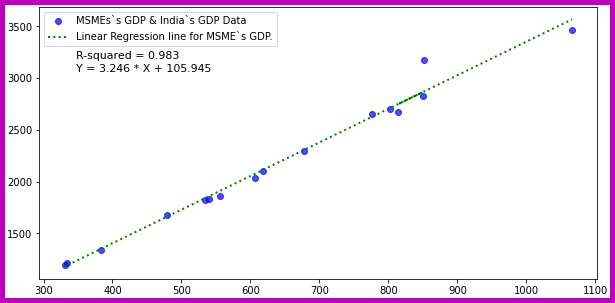

In [20]:
slope, intercept = np.polyfit(MSME_Performance2['MSME_GDP_IN_US_DOLLARS'],MSME_Performance2['India_GDP_in_US_Dollars'], deg=1)
regression_line = np.polyval([slope, intercept], MSME_Performance2['MSME_GDP_IN_US_DOLLARS'])
plt.figure(figsize=(10,5),facecolor='w', edgecolor='m',linewidth=10)
plt.scatter(MSME_Performance2['MSME_GDP_IN_US_DOLLARS'],MSME_Performance2['India_GDP_in_US_Dollars'],c='b',alpha=.7,label='MSMEs`s GDP & India`s GDP Data')
plt.plot(MSME_Performance2['MSME_GDP_IN_US_DOLLARS'],regression_line,ls=":",lw=2,color='g', label='Linear Regression line for MSME`s GDP.')
plt.annotate(f"R-squared = {round(RA_Model1.rsquared,3)}",xy=(0.065, 0.81),xycoords="axes fraction",fontsize=11)
plt.annotate('Y = 3.246 * X + 105.945',xy=(0.065, 0.76),xycoords="axes fraction",fontsize=11)

plt.legend(fontsize=10)
plt.show()

#### Detect the Outliers

In [21]:
# Calculate Z-scores for X outliers
z_scores_X = zscore(MSME_Performance2['MSME_GDP_IN_US_DOLLARS'])
X_outliers = (abs(z_scores_X) > 3)
# Calculate Z-scores for Y outliers
z_scores_Y = zscore(MSME_Performance2['India_GDP_in_US_Dollars'])
Y_outliers = (abs(z_scores_Y) > 3)
print("SL.No.",X_outliers.name,'\n',+X_outliers,"\n\nSL.No.",Y_outliers.name,'\n',Y_outliers)

SL.No. MSME_GDP_IN_US_DOLLARS 
 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
Name: MSME_GDP_IN_US_DOLLARS, dtype: bool 

SL.No. India_GDP_in_US_Dollars 
 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
Name: India_GDP_in_US_Dollars, dtype: bool


#### Test For Normality of variables

In [22]:
# Perform Jarque-Bera test
jb_test_x = jarque_bera(MSME_Performance2['MSME_GDP_IN_US_DOLLARS'])
print(f"Jarque-Bera Test for MSME GDP: Statistic={round(jb_test_x.statistic,3)}, p-value={round(jb_test_x.pvalue,3)}")
if (jb_test_x.pvalue>0.05):
    print("So MSME GDP($) data is normal\n");
else:
    print("So MSME GDP($) data is non-normal\n")
        

jb_test_y = jarque_bera(MSME_Performance2['India_GDP_in_US_Dollars'])
print(f"Jarque-Bera Test for MSME GDP: Statistic={round(jb_test_y.statistic,3)}, p-value={round(jb_test_y.pvalue,3)}")
if (jb_test_y.pvalue>0.05):
    print("So India GDP($) data is normal\n");
else:
    print("So India GDP($) data is non-normal\n")

Jarque-Bera Test for MSME GDP: Statistic=0.448, p-value=0.799
So MSME GDP($) data is normal

Jarque-Bera Test for MSME GDP: Statistic=0.7, p-value=0.705
So India GDP($) data is normal



#### Regression Analysis of INDIA'S GDP , MSMEs'S Export & MSMEs'S Investment .

In [23]:
RA_Model2,GDP_RA2=mf.Regression_Analysis('India_GDP_in_US_Dollars ~MSME_Export_in_Dollars+MSME_Investment_in_Dollars',MSME_Performance2)
print(GDP_RA2)
# Get the intercept (beta_0)
intercept = RA_Model2.params[0]
# Get the coefficients (beta_1, beta_2, etc.)
beta_1 = RA_Model2.params[1]
beta_2 = RA_Model2.params[2]

                               OLS Regression Results                              
Dep. Variable:     India_GDP_in_US_Dollars   R-squared:                       0.752
Model:                                 OLS   Adj. R-squared:                  0.714
Method:                      Least Squares   F-statistic:                     19.68
Date:                     Thu, 24 Oct 2024   Prob (F-statistic):           0.000117
Time:                             03:23:01   Log-Likelihood:                -115.53
No. Observations:                       16   AIC:                             237.1
Df Residuals:                           13   BIC:                             239.4
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

#### Plot Multiple Regression Plane

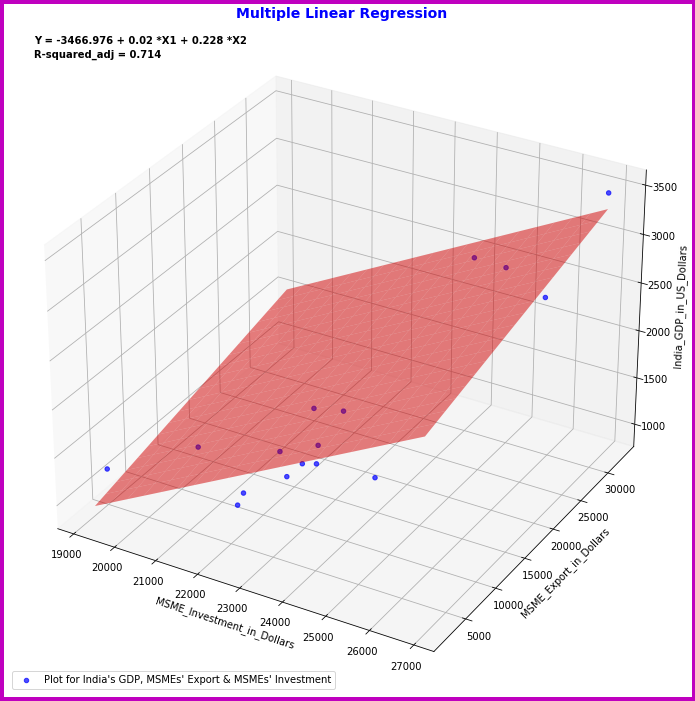

In [24]:
# Create the figure and add 3D subplot
fig = plt.figure(figsize=(12, 18), facecolor='w', edgecolor='m', linewidth=8)
ax = fig.add_subplot(111, projection="3d")

# Scatter plot for the actual data
ax.scatter(
    MSME_Performance2['MSME_Investment_in_Dollars'],
    MSME_Performance2['MSME_Export_in_Dollars'],
    MSME_Performance2['India_GDP_in_US_Dollars'],
    c='b', alpha=0.7, label="Plot for India's GDP, MSMEs' Export & MSMEs' Investment"
)

# Add annotations for R-squared and the regression equation
r_squared_adj = RA_Model2.rsquared_adj
plt.annotate(f"R-squared_adj = {round(r_squared_adj, 3)}", xy=(0.04, 0.95), xycoords="axes fraction", fontsize=10, fontweight='bold', color='k')
plt.annotate(f'Y = {round(intercept, 3)} + {round(beta_1, 3)} *X1 + {round(beta_2, 3)} *X2', xy=(0.04, 0.97), xycoords="axes fraction", fontsize=10, fontweight='bold', color='k')

# Generate the meshgrid for plotting the regression plane
x1_min, x1_max = MSME_Performance2['MSME_Investment_in_Dollars'].min(), MSME_Performance2['MSME_Investment_in_Dollars'].max()
x2_min, x2_max = MSME_Performance2['MSME_Export_in_Dollars'].min(), MSME_Performance2['MSME_Export_in_Dollars'].max()
x1_grid, x2_grid = np.meshgrid(np.linspace(x1_min, x1_max, 20), np.linspace(x2_min, x2_max, 20))

# Flatten and combine the grid points for prediction
x1_flat = x1_grid.ravel()
x2_flat = x2_grid.ravel()

# Calculate the predicted values manually using the regression equation
y_pred = intercept + beta_1 * x2_flat + beta_2 * x1_flat
y_pred_grid = y_pred.reshape(x1_grid.shape)

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5)

# Set axis labels
ax.set_xlabel('MSME_Investment_in_Dollars')
ax.set_ylabel('MSME_Export_in_Dollars')
ax.set_zlabel('India_GDP_in_US_Dollars')
ax.set_title('Multiple Linear Regression', color='b',fontsize=14, fontweight='bold')

# Show legend
ax.legend(fontsize=10,loc='lower left')

# Display the plot
plt.show()


### Work For MSME_Performance2 (2000-01 FY to 2021-22 FY)

In [25]:
#print(Year_wise_MSME,'\n')
Year_wise_Type_MSME=pd.DataFrame(Year_wise_MSME)
Year_wise_Type_MSME[['Micro', 'Small', 'Medium']]=round(Year_wise_MSME[['Micro', 'Small', 'Medium']].apply(lambda x: x / 1000),2)
print('\t  All Values Are in 1000 \n','='*40,'\n',Year_wise_Type_MSME)

	  All Values Are in 1000 
          Year    Micro   Small  Medium
0   2007-2008  153.110  16.730   0.470
1   2008-2009  170.260  18.790   0.700
2   2009-2010  185.180  23.870   1.410
3   2010-2011  205.110  29.120   1.260
4   2011-2012  242.540  34.220   2.950
5   2012-2013  275.870  41.500   5.450
6   2013-2014  296.530  59.130   7.340
7   2014-2015  346.210  70.930   8.220
8   2015-2016  420.660  71.150   2.690
9   2016-2017 2138.560 217.460   8.780
10  2017-2018 1342.930 167.230   6.740
11  2018-2019 1867.930 242.350   9.460
12  2019-2020 2248.730 302.300  11.230
13  2020-2021 3595.580 400.520  35.540
14  2021-2022 4975.080 172.430  11.290


   Summary of Year wise Type of MSME 
+-------+---------+---------+----------+
|       |   Micro |   Small |   Medium |
+=======+=========+=========+==========+
| count |      15 |      15 |       15 |
+-------+---------+---------+----------+
|  mean | 1230.95 |  124.52 |     7.57 |
+-------+---------+---------+----------+
|   std | 1476.54 |  119.97 |     8.62 |
+-------+---------+---------+----------+
|   min |  153.11 |   16.73 |     0.47 |
+-------+---------+---------+----------+
|   25% |  223.82 |   31.67 |     2.05 |
+-------+---------+---------+----------+
|   50% |  346.21 |   70.93 |     6.74 |
+-------+---------+---------+----------+
|   75% | 2003.24 |  194.94 |     9.12 |
+-------+---------+---------+----------+
|   max | 4975.08 |  400.52 |    35.54 |
+-------+---------+---------+----------+ 



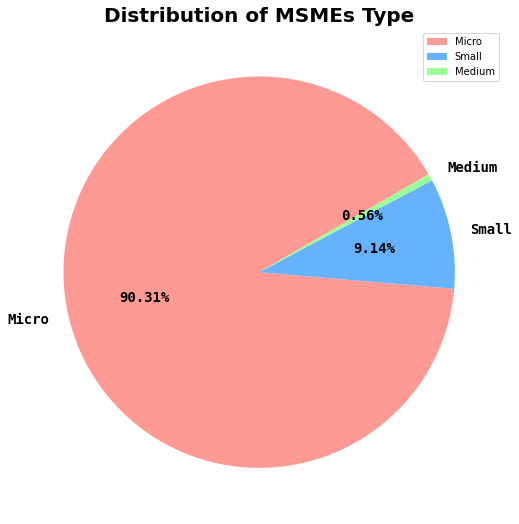

In [26]:
Describe=round(Year_wise_Type_MSME.describe(),2)
print('='*40,'\n','  Summary of Year wise Type of MSME \n'+tab(Describe,headers='keys', tablefmt='grid', numalign='right', stralign='right'),'\n')
plt.figure(figsize=(25,9),facecolor='w')
custom_colors = ["#FF9994", "#66B2FF","#99FF99", "#FFCC95"]
sns.set_palette(custom_colors)
plt.pie(Describe.iloc[1],labels=Year_wise_MSME.columns[1:4],autopct='%1.2f%%',startangle=30,textprops={'family': 'monospace','fontsize': 14, 'fontweight': 'bold'})
plt.title('Distribution of MSMEs Type', fontdict={'family': 'sans-serif','fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.show()

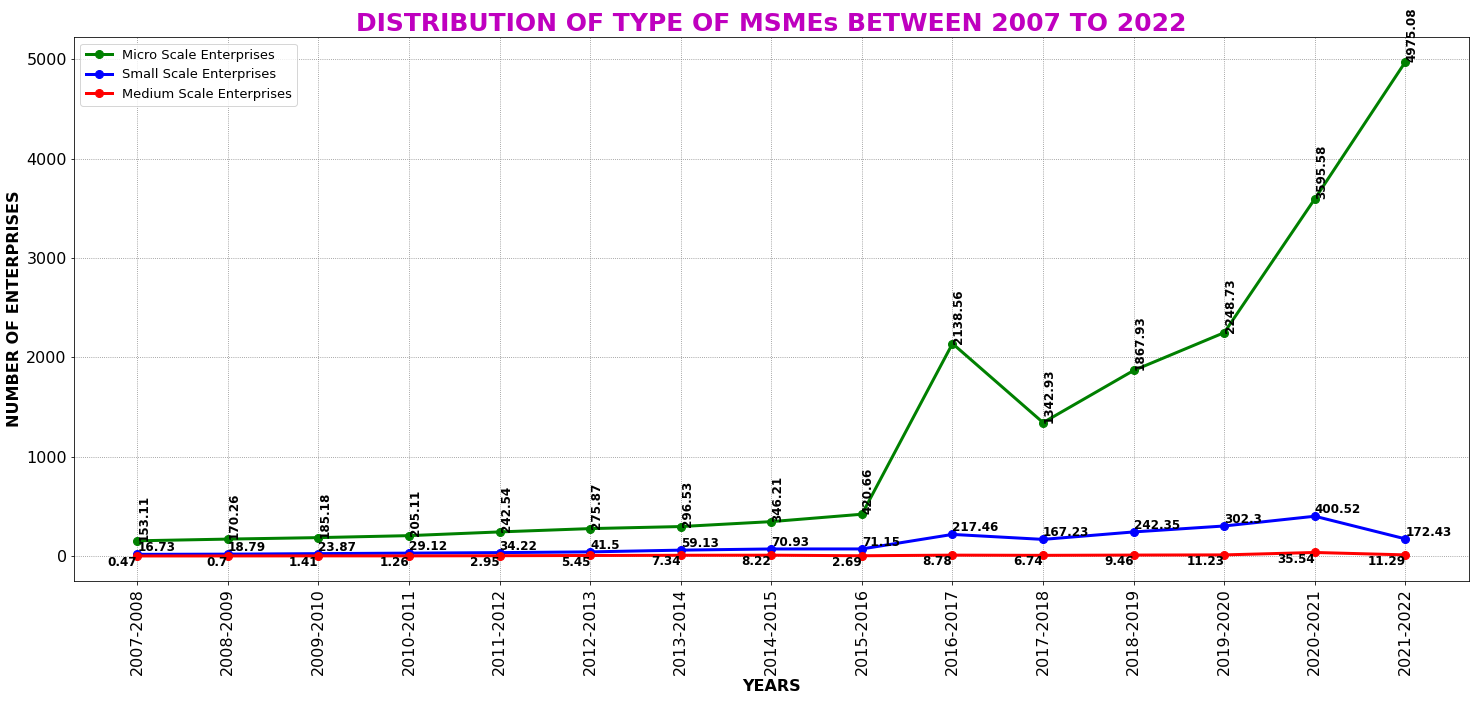

In [27]:
plt.figure(figsize=(25,10),facecolor='w')
plt.grid(True,color='gray', linestyle=':', linewidth=0.8,zorder=0)
w=3 #width of line
X=np.arange(len(Year_wise_Type_MSME['Year']))
plt.xticks(X, Year_wise_Type_MSME['Year'],rotation=90,fontsize=16)
plt.yticks(fontsize=16)

plt.plot(Year_wise_Type_MSME['Year'],Year_wise_Type_MSME['Micro'],lw=w,marker='o',markersize=8 ,label='Micro Scale Enterprises',color='g')
for i, v in enumerate(Year_wise_Type_MSME['Micro']):
    plt.annotate(str(v), xy=(i, v), ha='left', va='bottom',fontweight='bold', fontsize=12,color='k',rotation=90)
    
plt.plot(Year_wise_Type_MSME['Year'],Year_wise_Type_MSME['Small'],lw=w,marker='o',markersize=8,label='Small Scale Enterprises',color='b')
for i, v in enumerate(Year_wise_Type_MSME['Small']):
    plt.annotate(str(v), xy=(i, v), ha='left', va='bottom',fontweight='bold', fontsize=12,color='k')
    
plt.plot(Year_wise_Type_MSME['Year'],Year_wise_Type_MSME['Medium'],lw=w,marker='o',markersize=8,label='Medium Scale Enterprises',color='r')
for i, v in enumerate(Year_wise_Type_MSME['Medium']):
    plt.annotate(str(v), xy=(i, v), ha='right', va='top',fontweight='bold', fontsize=12,color='k')
    
plt.xlabel("YEARS",fontsize=16,fontweight='bold')
plt.ylabel("NUMBER OF ENTERPRISES",fontsize=16,fontweight='bold')
plt.title('DISTRIBUTION OF TYPE OF MSMEs BETWEEN 2007 TO 2022',fontweight='bold', fontsize=25,color='m')

plt.legend(fontsize=13,loc='best')
plt.show()

In [28]:
correlation_matrix = Year_wise_MSME[['Micro', 'Small', 'Medium']].corr()
print('\t   Correlation Matrix \n'+tab(correlation_matrix,headers='keys',tablefmt='grid'))

	   Correlation Matrix 
+--------+----------+----------+----------+
|        |    Micro |    Small |   Medium |
+========+==========+==========+==========+
| Micro  | 1        | 0.777806 | 0.696043 |
+--------+----------+----------+----------+
| Small  | 0.777806 | 1        | 0.856017 |
+--------+----------+----------+----------+
| Medium | 0.696043 | 0.856017 | 1        |
+--------+----------+----------+----------+


### State Wise Type of MSMEs and Major Working Sectors [ MANUFACTURING & SERVICE ] - 2019 to 2022

In [29]:
Dist_wise_Manu_Serv

DISTRICT_NAME           STATE  MICRO_SERVICE  SMALL_SERVICE  \
0              ANANTHAPUR  ANDHRA PRADESH           7971            241   
1                 CHITOOR  ANDHRA PRADESH           9758            354   
2           EAST GODAVARI  ANDHRA PRADESH          12562            627   
3                  GUNTUR  ANDHRA PRADESH          11574            635   
4                 KRISHNA  ANDHRA PRADESH          15428           1015   
..                    ...             ...            ...            ...   
733  LAKSHADWEEP DISTRICT     LAKSHADWEEP            123              0   
734              KARAIKAL      PUDUCHERRY           1002             47   
735                  MAHE      PUDUCHERRY             73             11   
736           PONDICHERRY      PUDUCHERRY           5681            202   
737                 YANAM      PUDUCHERRY             65              6   

     MEDIUM_SERVICE  MICRO_MANUFACTURING  SMALL_MANUFACTURING  \
0                10                11606                  486   
1                19                13226                  597   
2                49                16984                 1062   
3                54                16205                 1689   
4                79                20755                 1684   
..              ...                  ...                  ...   
733               0                  160                    0   
734               1                 1266                   56   
735               0                   97                   17   
736              21                 7827                  413   
737               0                   85                   15   

     MEDIUM_MANUFACTURING  TOTAL_SERVICE  TOTAL_MANUFACTURING  
0                      33           8222                12125  
1                      51          10131                13874  
2                     124          13238                18170  
3                     169          12263                18063  
4                     165          16522                22604  
..                    ...            ...                  ...  
733                     0            123                  160  
734                     2           1050                 1324  
735                     0             84                  114  
736                    50           5904                 8290  
737                     2             71                  102  

[738 rows x 10 columns]

In [30]:
State_Data=Dist_wise_Manu_Serv.groupby('STATE')[Dist_wise_Manu_Serv.columns.drop(['DISTRICT_NAME','STATE'])].sum()
State_Data=State_Data.sort_values(by='TOTAL_MANUFACTURING',ascending = False)
State_Data.reset_index(inplace=True)
print(State_Data)

                          STATE  MICRO_SERVICE  SMALL_SERVICE  MEDIUM_SERVICE  \
0                   MAHARASHTRA         980401          25607            2815   
1                    TAMIL NADU         437536          14049            1055   
2                       GUJARAT         287732          12192            1170   
3                     RAJASTHAN         334112           9061             618   
4                 UTTAR PRADESH         333104          11749             923   
5                     KARNATAKA         253184          10576             998   
6                MADHYA PRADESH         199357           6727             398   
7                         BIHAR         171434           3987             245   
8                       HARYANA         150806           7307             585   
9                        PUNJAB         144102           5082             338   
10                    TELANGANA         153115           6830             717   
11                        DE

In [31]:
State_Data.describe()

MICRO_SERVICE  SMALL_SERVICE  MEDIUM_SERVICE  MICRO_MANUFACTURING  \
count         37.000         37.000          37.000               37.000   
mean      116722.189       4292.595         382.378           169683.243   
std       184592.991       5533.885         566.689           261542.186   
min          123.000          0.000           0.000              160.000   
25%         2925.000        112.000           9.000             3958.000   
50%        48878.000       2201.000         171.000            75475.000   
75%       150806.000       6830.000         585.000           215284.000   
max       980401.000      25607.000        2815.000          1327794.000   

       SMALL_MANUFACTURING  MEDIUM_MANUFACTURING  TOTAL_SERVICE  \
count               37.000                37.000         37.000   
mean              8641.865               928.459     121397.162   
std              11841.112              1366.438     190368.880   
min                  0.000                 0.000        123.000   
25%                253.000                21.000       3043.000   
50%               3367.000               308.000      50107.000   
75%              12614.000              1635.000     158698.000   
max              50343.000              6399.000    1008823.000   

       TOTAL_MANUFACTURING  
count               37.000  
mean            179253.568  
std             273948.699  
min                160.000  
25%               4280.000  
50%              77502.000  
75%             228981.000  
max            1384536.000

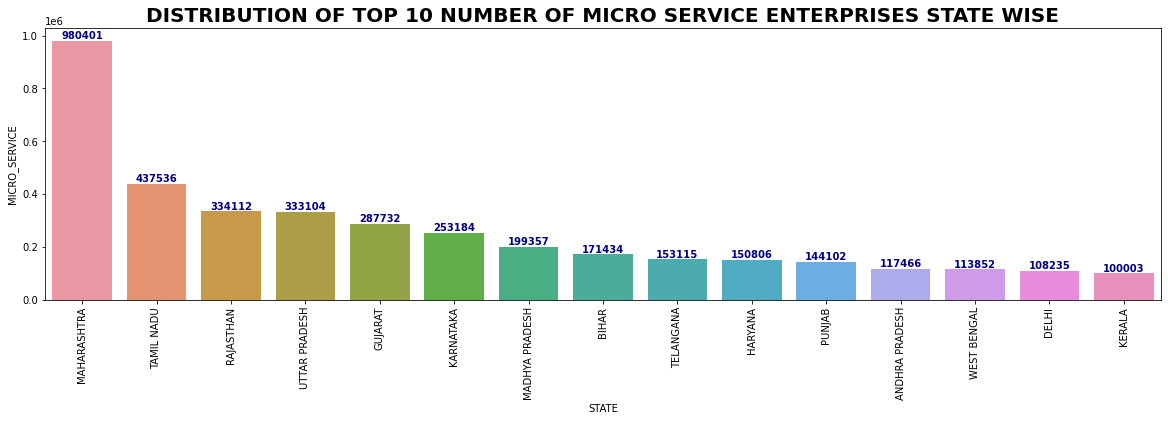

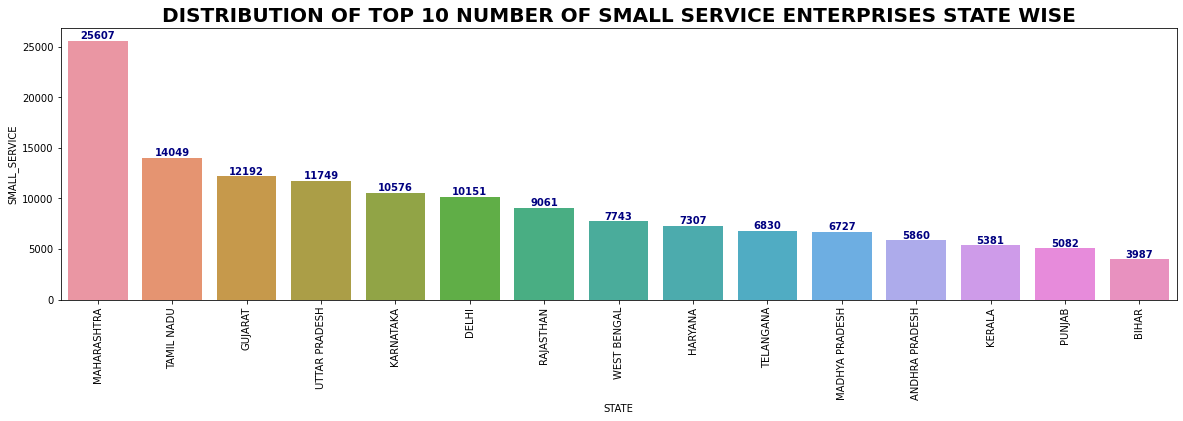

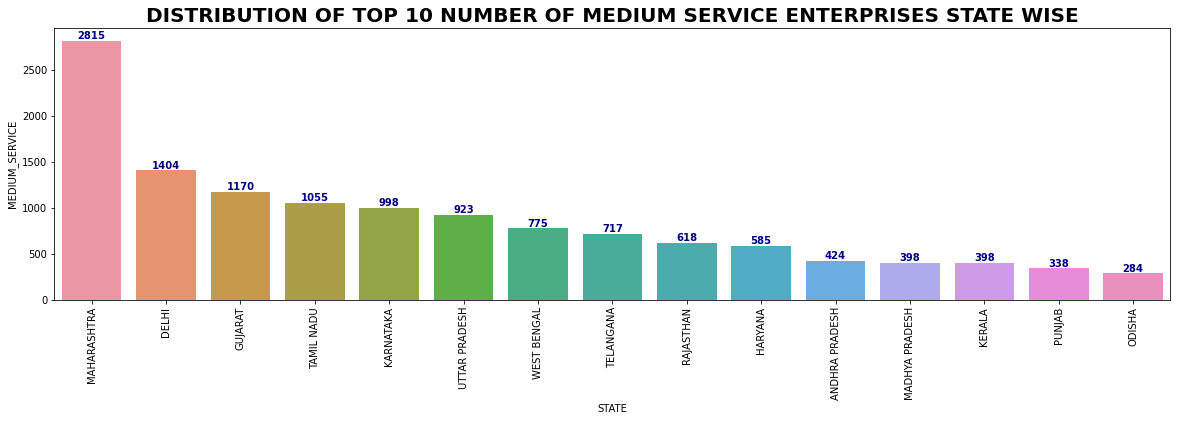

In [32]:
Top15_Micro_Serv_State=State_Data[['STATE','MICRO_SERVICE']].sort_values(by='MICRO_SERVICE', ascending=False).head(15)
Top15_Small_Serv_State=State_Data[['STATE','SMALL_SERVICE']].sort_values(by='SMALL_SERVICE', ascending=False).head(15)
Top15_Medium_Serv_State=State_Data[['STATE','MEDIUM_SERVICE']].sort_values(by='MEDIUM_SERVICE', ascending=False).head(15)

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Top15_Micro_Serv_State['STATE'],y=Top15_Micro_Serv_State['MICRO_SERVICE'])
for i,v in enumerate(Top15_Micro_Serv_State['MICRO_SERVICE']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF TOP 10 NUMBER OF MICRO SERVICE ENTERPRISES STATE WISE',fontweight='bold',fontsize=20)
plt.show()

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Top15_Small_Serv_State['STATE'],y=Top15_Small_Serv_State['SMALL_SERVICE'])
for i,v in enumerate(Top15_Small_Serv_State['SMALL_SERVICE']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF TOP 10 NUMBER OF SMALL SERVICE ENTERPRISES STATE WISE',fontweight='bold',fontsize=20)
plt.show()

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Top15_Medium_Serv_State['STATE'],y=Top15_Medium_Serv_State['MEDIUM_SERVICE'])
for i,v in enumerate(Top15_Medium_Serv_State['MEDIUM_SERVICE']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF TOP 10 NUMBER OF MEDIUM SERVICE ENTERPRISES STATE WISE',fontweight='bold',fontsize=20)
plt.show()

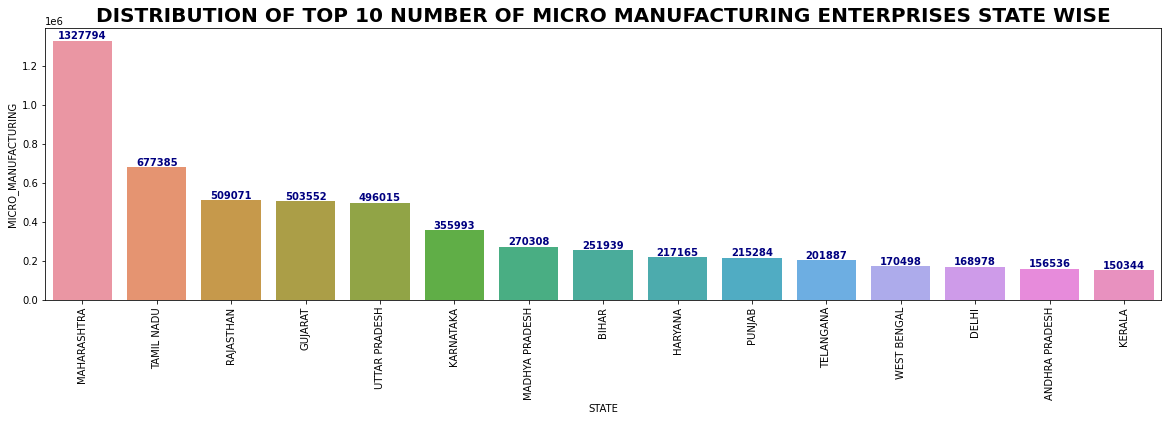

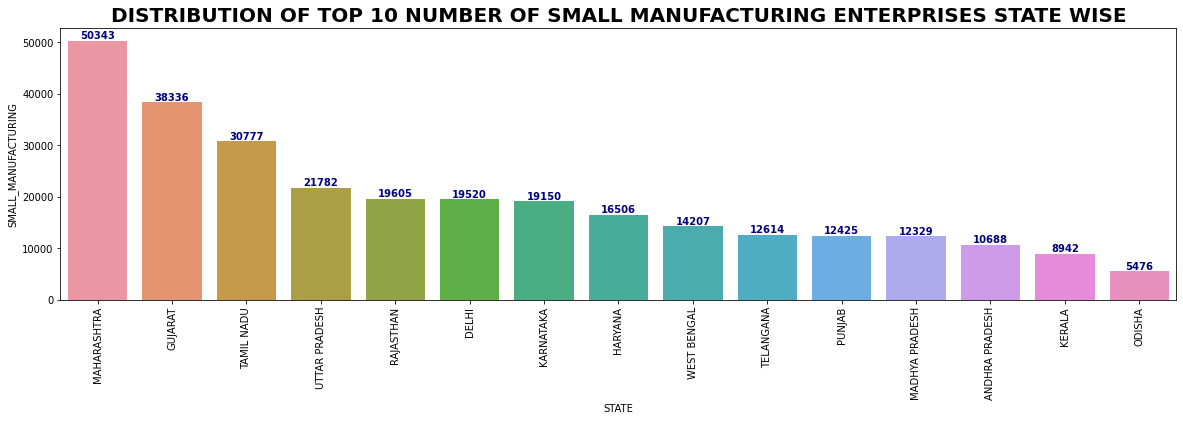

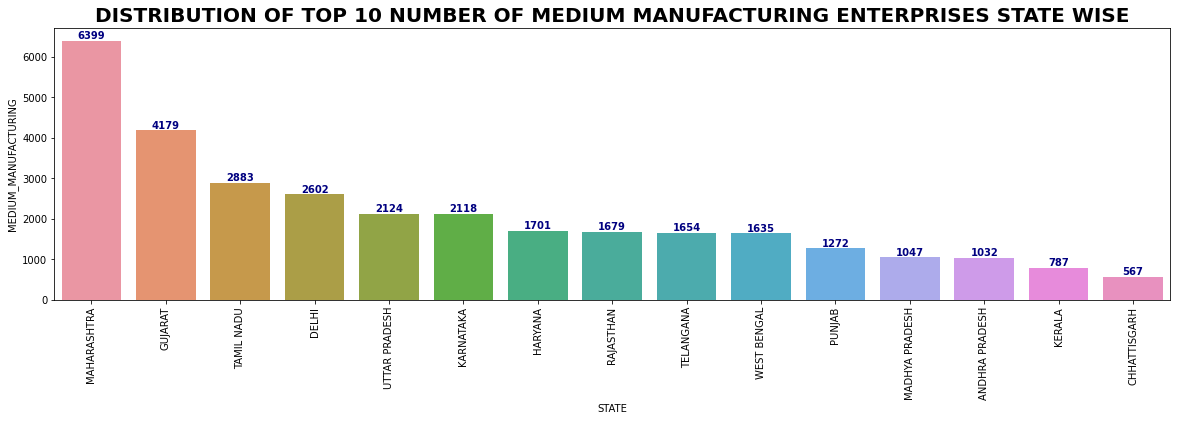

In [33]:

Top15_Micro_Manf_State=State_Data[['STATE','MICRO_MANUFACTURING']].sort_values(by='MICRO_MANUFACTURING', ascending=False).head(15)
Top15_Small_Manf_State=State_Data[['STATE','SMALL_MANUFACTURING']].sort_values(by='SMALL_MANUFACTURING', ascending=False).head(15)
Top15_Medium_Manf_State=State_Data[['STATE','MEDIUM_MANUFACTURING']].sort_values(by='MEDIUM_MANUFACTURING', ascending=False).head(15)

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Top15_Micro_Manf_State['STATE'],y=Top15_Micro_Manf_State['MICRO_MANUFACTURING'])
for i,v in enumerate(Top15_Micro_Manf_State['MICRO_MANUFACTURING']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF TOP 10 NUMBER OF MICRO MANUFACTURING ENTERPRISES STATE WISE',fontweight='bold',fontsize=20)
plt.show()

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Top15_Small_Manf_State['STATE'],y=Top15_Small_Manf_State['SMALL_MANUFACTURING'])
for i,v in enumerate(Top15_Small_Manf_State['SMALL_MANUFACTURING']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF TOP 10 NUMBER OF SMALL MANUFACTURING ENTERPRISES STATE WISE',fontweight='bold',fontsize=20)
plt.show()

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Top15_Medium_Manf_State['STATE'],y=Top15_Medium_Manf_State['MEDIUM_MANUFACTURING'])
for i,v in enumerate(Top15_Medium_Manf_State['MEDIUM_MANUFACTURING']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF TOP 10 NUMBER OF MEDIUM MANUFACTURING ENTERPRISES STATE WISE',fontweight='bold',fontsize=20)
plt.show()

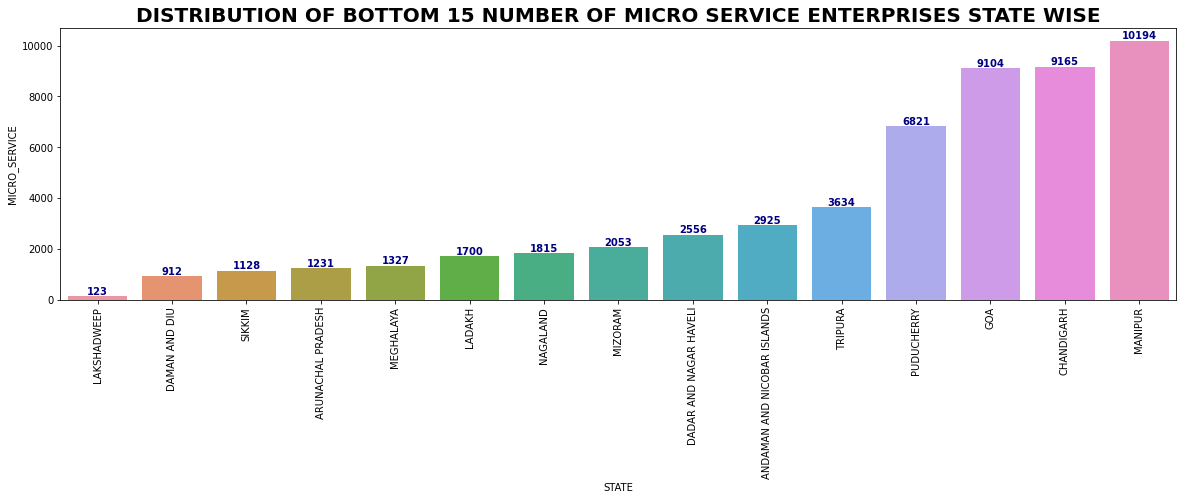

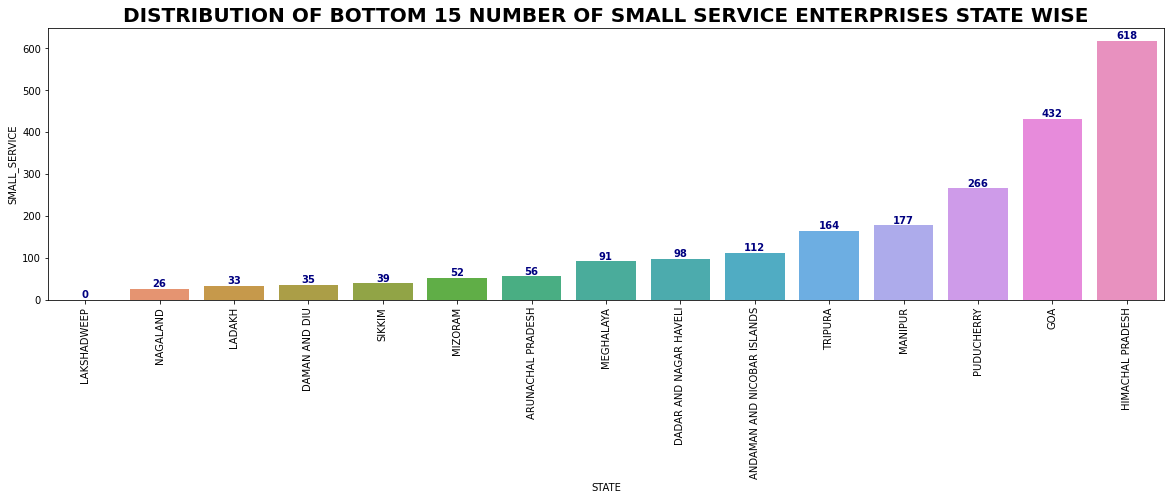

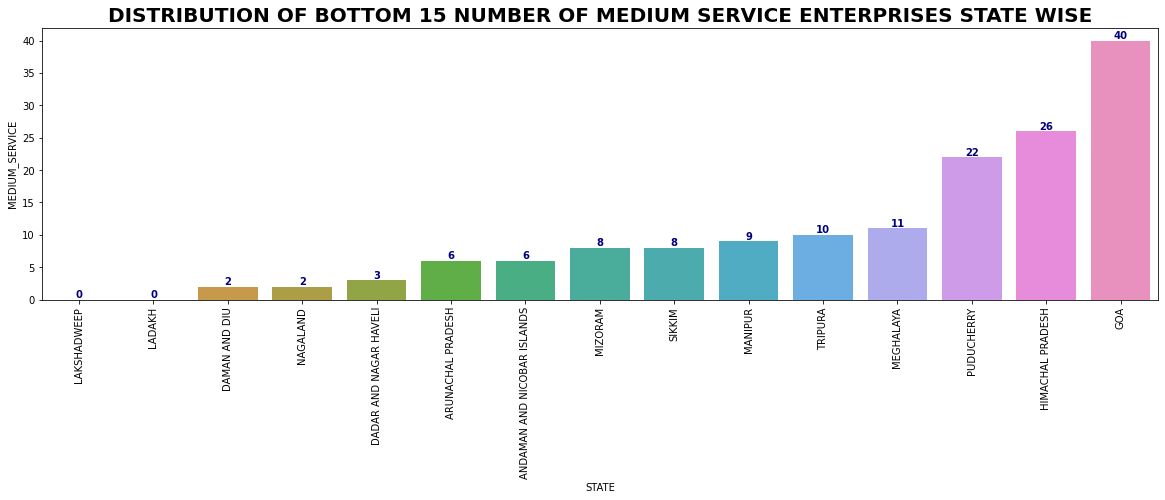

In [34]:
Bottom15_Micro_Serv_State=State_Data[['STATE','MICRO_SERVICE']].sort_values(by='MICRO_SERVICE', ascending=True).head(15)
Bottom15_Small_Serv_State=State_Data[['STATE','SMALL_SERVICE']].sort_values(by='SMALL_SERVICE', ascending=True).head(15)
Bottom15_Medium_Serv_State=State_Data[['STATE','MEDIUM_SERVICE']].sort_values(by='MEDIUM_SERVICE', ascending=True).head(15)

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Bottom15_Micro_Serv_State['STATE'],y=Bottom15_Micro_Serv_State['MICRO_SERVICE'])
for i,v in enumerate(Bottom15_Micro_Serv_State['MICRO_SERVICE']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF BOTTOM 15 NUMBER OF MICRO SERVICE ENTERPRISES STATE WISE',fontweight='bold',fontsize=20)
plt.show()

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Bottom15_Small_Serv_State['STATE'],y=Bottom15_Small_Serv_State['SMALL_SERVICE'])
for i,v in enumerate(Bottom15_Small_Serv_State['SMALL_SERVICE']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF BOTTOM 15 NUMBER OF SMALL SERVICE ENTERPRISES STATE WISE',fontweight='bold',fontsize=20)
plt.show()

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Bottom15_Medium_Serv_State['STATE'],y=Bottom15_Medium_Serv_State['MEDIUM_SERVICE'])
for i,v in enumerate(Bottom15_Medium_Serv_State['MEDIUM_SERVICE']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF BOTTOM 15 NUMBER OF MEDIUM SERVICE ENTERPRISES STATE WISE',fontweight='bold',fontsize=20)
plt.show()

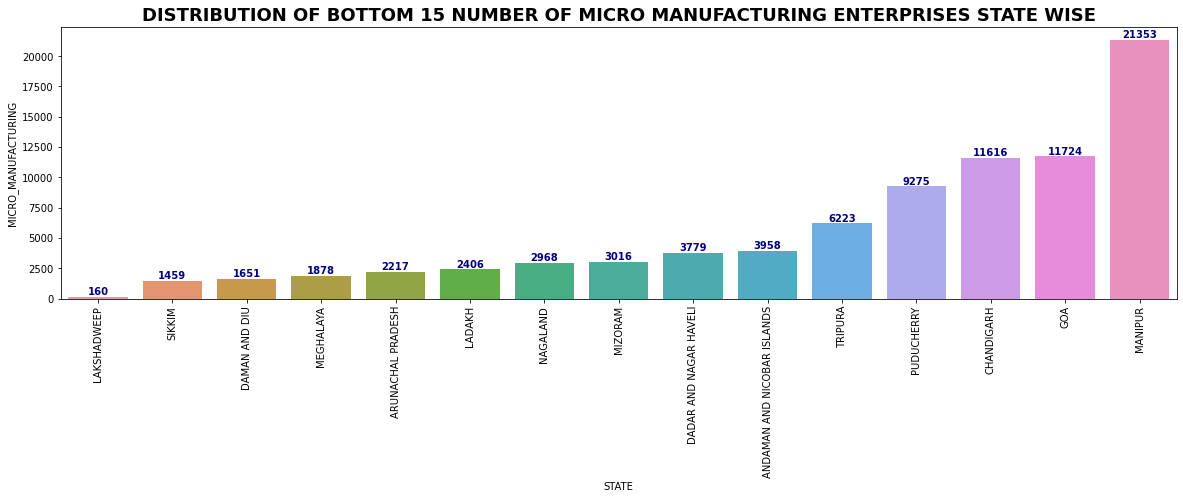

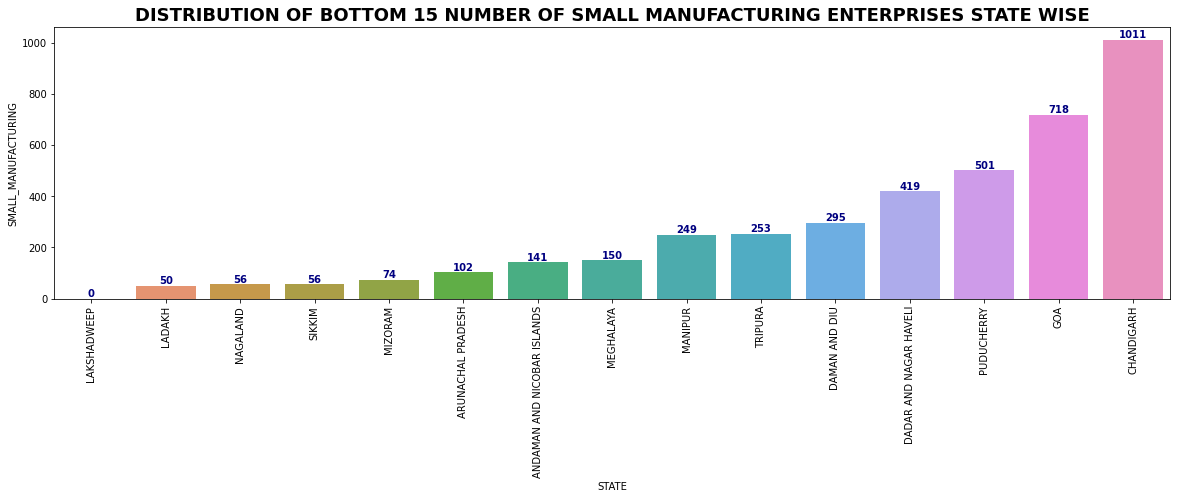

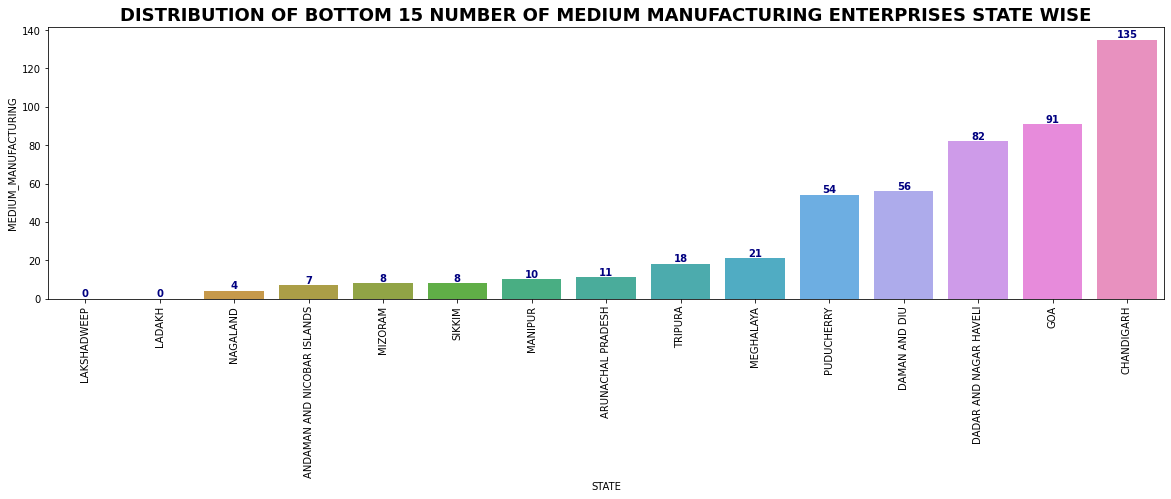

In [35]:
Bottom15_Micro_Manf_State=State_Data[['STATE','MICRO_MANUFACTURING']].sort_values(by='MICRO_MANUFACTURING', ascending=True).head(15)
Bottom15_Small_Manf_State=State_Data[['STATE','SMALL_MANUFACTURING']].sort_values(by='SMALL_MANUFACTURING', ascending=True).head(15)
Bottom15_Medium_Manf_State=State_Data[['STATE','MEDIUM_MANUFACTURING']].sort_values(by='MEDIUM_MANUFACTURING', ascending=True).head(15)

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Bottom15_Micro_Manf_State['STATE'],y=Bottom15_Micro_Manf_State['MICRO_MANUFACTURING'])
for i,v in enumerate(Bottom15_Micro_Manf_State['MICRO_MANUFACTURING']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF BOTTOM 15 NUMBER OF MICRO MANUFACTURING ENTERPRISES STATE WISE',fontweight='bold',fontsize=18)
plt.show()

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Bottom15_Small_Manf_State['STATE'],y=Bottom15_Small_Manf_State['SMALL_MANUFACTURING'])
for i,v in enumerate(Bottom15_Small_Manf_State['SMALL_MANUFACTURING']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF BOTTOM 15 NUMBER OF SMALL MANUFACTURING ENTERPRISES STATE WISE',fontweight='bold',fontsize=18)
plt.show()

plt.figure(facecolor='w',figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=Bottom15_Medium_Manf_State['STATE'],y=Bottom15_Medium_Manf_State['MEDIUM_MANUFACTURING'])
for i,v in enumerate(Bottom15_Medium_Manf_State['MEDIUM_MANUFACTURING']):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy')
plt.title('DISTRIBUTION OF BOTTOM 15 NUMBER OF MEDIUM MANUFACTURING ENTERPRISES STATE WISE',fontweight='bold',fontsize=18)
plt.show()

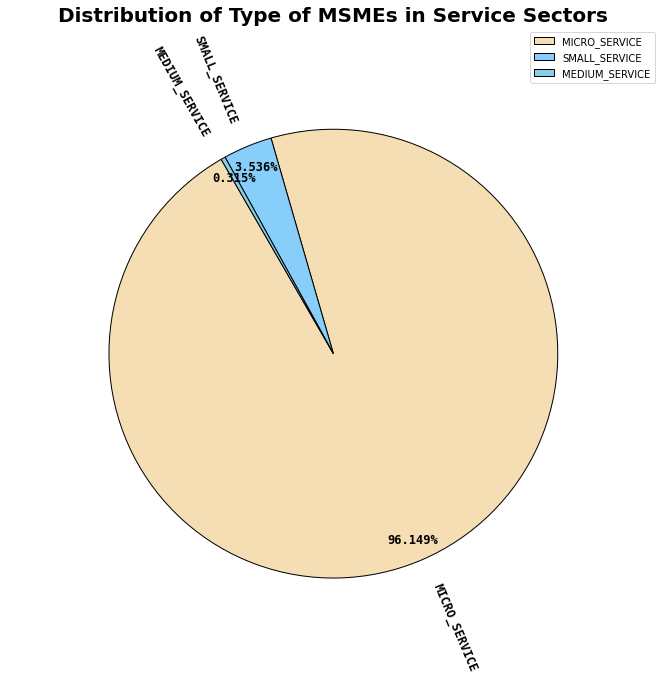

In [36]:
plt.figure(figsize=(25,12),facecolor='w')
plt.pie(State_Data.iloc[:,1:4].sum(),labels=State_Data.iloc[:,1:4].columns[0:4],colors= mf.randomcol(len(State_Data.iloc[:,1:4].columns[0:4])),autopct='%1.3f%%',startangle=120,radius=0.86,
        textprops={'family': 'monospace','fontsize': 12, 'fontweight': 'bold','color':'k'},pctdistance=0.9,wedgeprops={'edgecolor': 'black'},rotatelabels=True)
plt.title('Distribution of Type of MSMEs in Service Sectors', fontdict={'family': 'sans-serif','fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.show()

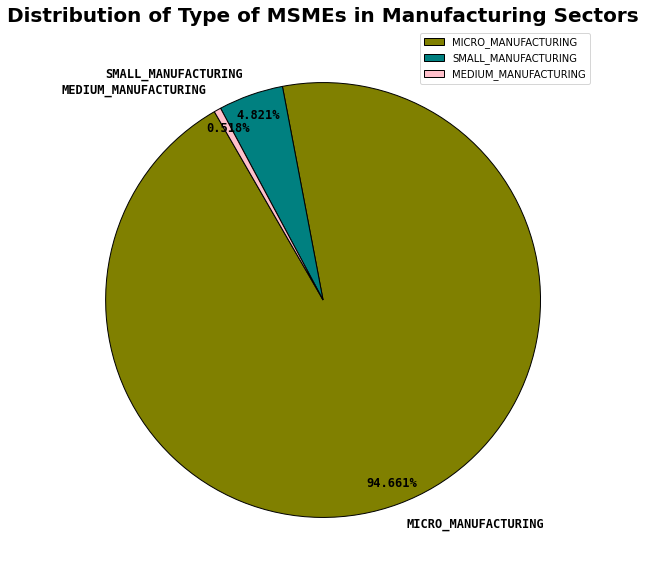

In [37]:
plt.figure(figsize=(25,10),facecolor='w')
plt.pie(State_Data.iloc[:,4:7].sum(),labels=State_Data.iloc[:,4:7].columns[0:4],colors=mf.randomcol(len(State_Data.iloc[:,4:7].columns[0:4])),autopct='%1.3f%%',startangle=120,radius=1,
        textprops={'family': 'monospace','fontsize': 12, 'fontweight': 'bold','color':'k'},pctdistance=0.9,wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Type of MSMEs in Manufacturing Sectors', fontdict={'family': 'sans-serif','fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.show()

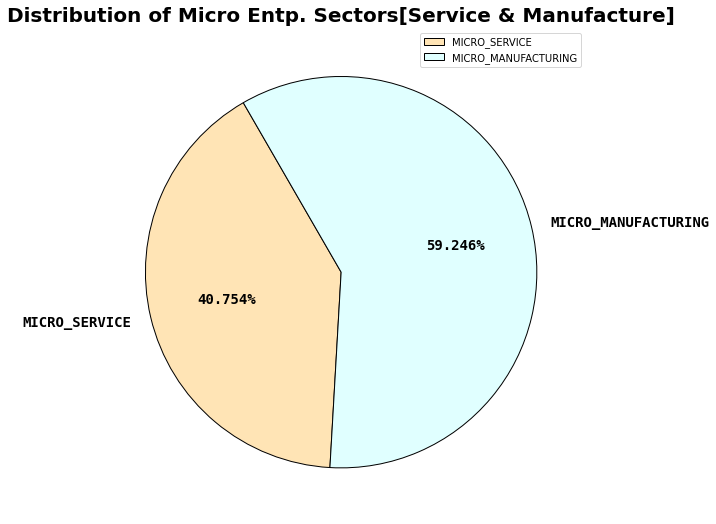

In [38]:
plt.figure(figsize=(25,9),facecolor='w')
plt.pie(State_Data.iloc[:,[1, 4]].sum(),labels=State_Data.iloc[:,[1, 4]].columns[0:2],colors=mf.randomcol(len(State_Data.iloc[:,[1, 4]].columns[0:2])),autopct='%1.3f%%',startangle=120,textprops={'family': 'monospace','fontsize': 14, 'fontweight': 'bold'},wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Micro Entp. Sectors[Service & Manufacture]', fontdict={'family': 'sans-serif','fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.show()

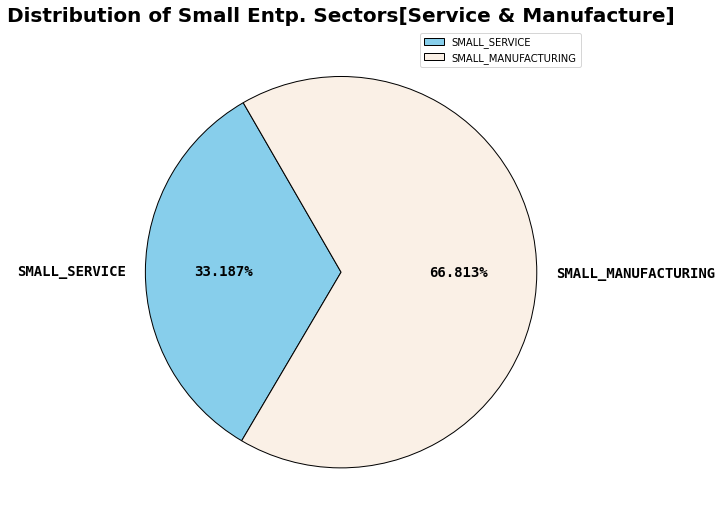

In [39]:
plt.figure(figsize=(25,9),facecolor='w')
plt.pie(State_Data.iloc[:,[2, 5]].sum(),labels=State_Data.iloc[:,[2, 5]].columns[0:2],colors=mf.randomcol(len(State_Data.iloc[:,[2, 5]].columns[0:2])),autopct='%1.3f%%',startangle=120,textprops={'family': 'monospace','fontsize': 14, 'fontweight': 'bold'},wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Small Entp. Sectors[Service & Manufacture]', fontdict={'family': 'sans-serif','fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.show()

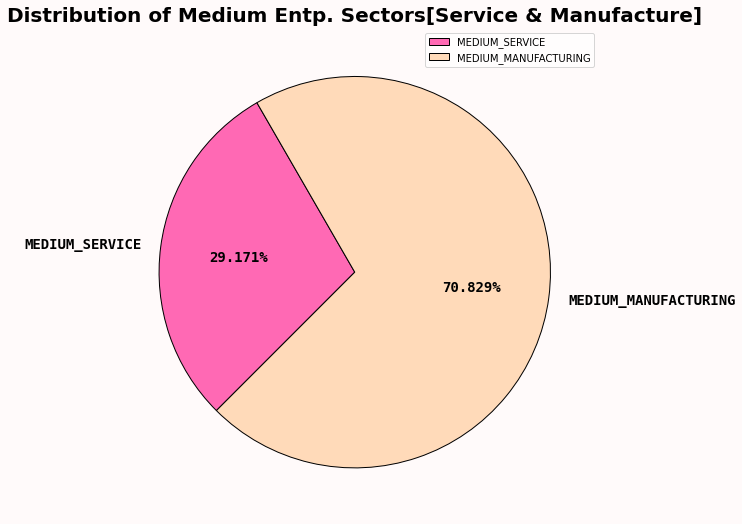

In [40]:
plt.figure(figsize=(25,9),facecolor='snow')
plt.pie(State_Data.iloc[:,[3, 6]].sum(),labels=State_Data.iloc[:,[3, 6]].columns[0:2],colors=mf.randomcol(len(State_Data.iloc[:,[3, 6]].columns[0:2])),autopct='%1.3f%%',startangle=120,textprops={'family': 'monospace','fontsize': 14, 'fontweight': 'bold'},wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Medium Entp. Sectors[Service & Manufacture]', fontdict={'family': 'sans-serif','fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.show()

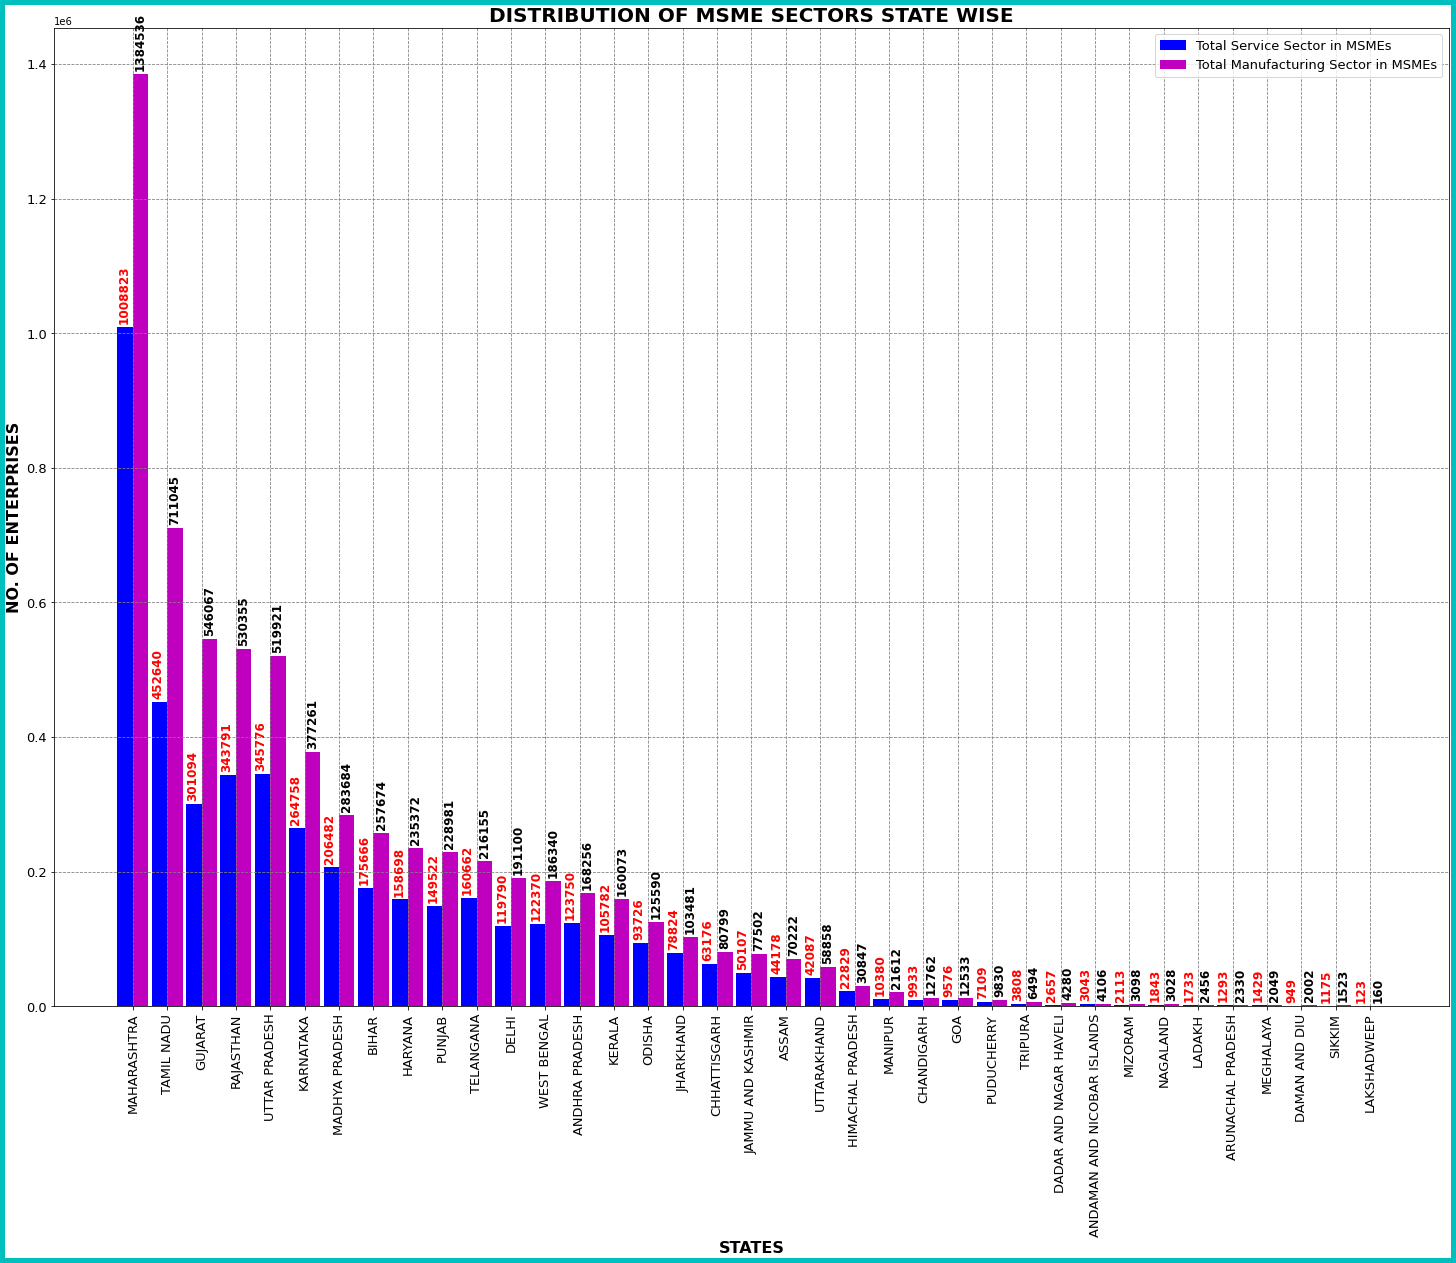

In [41]:
plt.figure(figsize=(25,18),facecolor='w', edgecolor='c',linewidth=10)
plt.grid(True,color='gray', linestyle='--', linewidth=0.8,zorder=0)
w=0.45 #width of bar
X=np.arange(len(State_Data['STATE']))
plt.xticks(X-w/2, State_Data['STATE'],rotation=90,fontsize=13)
plt.yticks(fontsize=13)

plt.bar(X-w,State_Data['TOTAL_SERVICE'],w,label='Total Service Sector in MSMEs',color='b')
for i, v in enumerate(round(State_Data['TOTAL_SERVICE'],3)):
    plt.annotate(str(v), xy=(i-0.3, v+5000), ha='right', va='bottom',fontweight='bold', fontsize=12,color='r',rotation=90)
    
plt.bar(X,State_Data['TOTAL_MANUFACTURING'],w,label='Total Manufacturing Sector in MSMEs',color='m')
for i, v in enumerate(round(State_Data['TOTAL_MANUFACTURING'],3)):
    plt.annotate(str(v), xy=(i, v+5000), ha='center', va='bottom',fontweight='bold', fontsize=12,color='k',rotation=90)
    
plt.xlabel("STATES",fontsize=16,fontweight='bold')
plt.ylabel("NO. OF ENTERPRISES",fontsize=16,fontweight='bold')
plt.title('DISTRIBUTION OF MSME SECTORS STATE WISE',fontweight='bold', fontsize=20,color='k')

plt.legend(fontsize=13,loc='best')
plt.show()

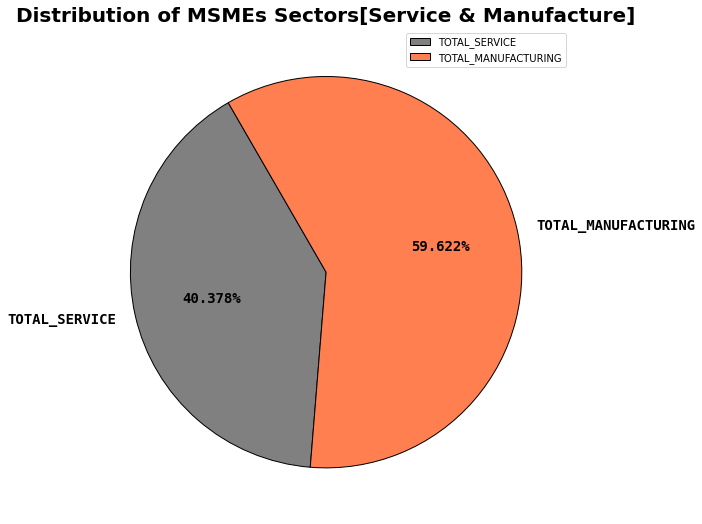

In [42]:
plt.figure(figsize=(25,9),facecolor='w')
plt.pie(State_Data.iloc[:,7:].sum(),labels=State_Data.iloc[:,7:].columns[0:2],colors=mf.randomcol(len(State_Data.iloc[:,7:].columns[0:2])),autopct='%1.3f%%',startangle=120,textprops={'family': 'monospace','fontsize': 14, 'fontweight': 'bold'},wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of MSMEs Sectors[Service & Manufacture]',fontdict={'family': 'sans-serif','fontsize': 20,'fontweight': 'bold'})
plt.legend()
plt.show()

In [43]:
A=Dist_wise_Manu_Serv.groupby(['DISTRICT_NAME'])[Dist_wise_Manu_Serv.columns.drop(['STATE','DISTRICT_NAME'])].sum()
print(A.describe())

       MICRO_SERVICE  SMALL_SERVICE  MEDIUM_SERVICE  MICRO_MANUFACTURING  \
count        733.000        733.000         733.000              733.000   
mean        5891.843        216.679          19.302             8565.184   
std        11156.710        506.060          67.552            16298.008   
min            0.000          0.000           0.000                0.000   
25%         1175.000         24.000           0.000             1656.000   
50%         2859.000         79.000           3.000             4034.000   
75%         6416.000        201.000          10.000             9083.000   
max       145590.000       5401.000         946.000           198594.000   

       SMALL_MANUFACTURING  MEDIUM_MANUFACTURING  TOTAL_SERVICE  \
count              733.000               733.000        733.000   
mean               436.220                46.866       6127.824   
std               1058.828               143.364      11645.500   
min                  0.000                 0.00

In [44]:
State_wise_male_Female["Zone"]=[
        "East", "South", "Northeast", "Northeast", "East", "North", "Central", "West", "West",
        "West", "West", "North", "North", "North", "East", "South", "South", "South",
        "Central", "West", "Northeast", "Northeast", "Northeast", "Northeast", "North",
        "East", "South", "North", "West", "Northeast", "South", "South", "Northeast",
        "Central", "North", "East"]
#State_wise_male_Female.set_index('States/UT', inplace=True) # Setting 'States/UT' as index for better visualization in heatmap
State_wise_male_Female.head(20)

States/UT  No_of_MSME_Lakh  Male_Owner_Lakh  \
0   Andaman & Nicobar Island            0.190            0.150   
1             Andhra Pradesh           33.870           21.603   
2          Arunachal Pradesh            0.230            0.162   
3                      Assam           12.140           11.280   
4                      Bihar           34.460           32.396   
5                 Chandigarh            0.560            0.443   
6               Chhattisgarh            8.480            7.270   
7     Dadara & Nagar Havelli            0.160            0.128   
8                Daman & Diu            0.080            0.059   
9                        Goa            0.700            0.560   
10                   Gujarat           33.160           23.759   
11                   Haryana            9.700            8.316   
12          Himachal Pradesh            3.920            3.295   
13           Jammu & Kashmir            7.090            6.241   
14                 Jharkhand           15.880           12.509   
15                 Karnataka           38.340           26.830   
16                    Kerala           23.790           16.470   
17               Lakshadweep            0.020            0.013   
18            Madhya Pradesh           26.740           22.753   
19               Maharashtra           47.780           37.970   

    Female_Owner_Lakh  Employeement_Male_Lakh  Employeement_Female_Lakh  \
0               0.050                   0.290                     0.100   
1               8.380                  34.980                    21.010   
2               0.063                   0.290                     0.110   
3               0.867                  16.370                     1.780   
4               1.983                  48.260                     4.790   
5               0.056                   1.170                     0.120   
6               0.910                  12.790                     4.070   
7               0.026                   0.290                     0.070   
8               0.016                   0.120                     0.020   
9               0.198                   1.200                     0.410   
10              8.266                  47.440                    13.710   
11              0.983                  16.270                     2.780   
12              0.503                   5.290                     1.130   
13              0.757                   9.370                     1.500   
14              3.404                  19.340                     5.570   
15              9.360                  51.110                    19.730   
16              4.950                  30.860                    13.770   
17              0.006                   0.020                     0.010   
18              3.704                  38.610                    10.130   
19              8.112                  72.770                    17.970   

    Total_Employeement_Lakh       Zone  
0                     0.390       East  
1                    55.990      South  
2                     0.400  Northeast  
3                    18.150  Northeast  
4                    53.050       East  
5                     1.290      North  
6                    16.860    Central  
7                     0.360       West  
8                     0.140       West  
9                     1.610       West  
10                   61.150       West  
11                   19.050      North  
12                    6.420      North  
13                   10.870      North  
14                   24.910       East  
15                   70.840      South  
16                   44.630      South  
17                    0.030      South  
18                   48.740    Central  
19                   90.740       West

In [45]:
import folium

# Create a dictionary with state/UT names, zones, coordinates, and total number of MSMEs
state_data = {
    "Jammu & Kashmir": {"zone": "North", "coordinates": [33.7782, 76.5762], "msme": 0.23},
    "Himachal Pradesh": {"zone": "North", "coordinates": [31.1048, 77.1734], "msme": 0.45},
    "Punjab": {"zone": "North", "coordinates": [31.1471, 75.3412], "msme": 14.65},
    "Haryana": {"zone": "North", "coordinates": [29.0588, 76.0856], "msme": 9.70},
    "Uttarakhand": {"zone": "North", "coordinates": [30.0668, 79.0193], "msme": 4.17},
    "Delhi": {"zone": "North", "coordinates": [28.7041, 77.1025], "msme": 9.36},
    "Chandigarh": {"zone": "North", "coordinates": [30.7333, 76.7794], "msme": 0.56},
    "Ladakh": {"zone": "North", "coordinates": [34.1526, 77.5771], "msme": 0.03},

    "Rajasthan": {"zone": "West", "coordinates": [27.0238, 74.2179], "msme": 26.87},
    "Gujarat": {"zone": "West", "coordinates": [22.2587, 71.1924], "msme": 33.16},
    "Goa": {"zone": "West", "coordinates": [15.2993, 74.1240], "msme": 0.70},
    "Maharashtra": {"zone": "West", "coordinates": [19.7515, 75.7139], "msme": 49.48},
    "Dadra & Nagar Haveli": {"zone": "West", "coordinates": [20.2763, 73.0153], "msme": 0.16},
    "Daman & Diu": {"zone": "West", "coordinates": [20.3974, 72.8328], "msme": 0.08},

    "Madhya Pradesh": {"zone": "Central", "coordinates": [22.9734, 78.6569], "msme": 26.74},
    "Chhattisgarh": {"zone": "Central", "coordinates": [21.2787, 81.8661], "msme": 8.48},
    "Uttar Pradesh": {"zone": "Central", "coordinates": [26.8467, 80.9462], "msme": 89.99},

    "West Bengal": {"zone": "East", "coordinates": [22.9868, 87.8550], "msme": 26.87},
    "Odisha": {"zone": "East", "coordinates": [20.9517, 85.0985], "msme": 19.84},
    "Bihar": {"zone": "East", "coordinates": [25.0961, 85.3131], "msme": 34.46},
    "Jharkhand": {"zone": "East", "coordinates": [23.6102, 85.2799], "msme": 15.88},
    "Andaman & Nicobar Islands": {"zone": "East", "coordinates": [11.7401, 92.6586], "msme": 0.08},

    "Assam": {"zone": "Northeast", "coordinates": [26.2006, 92.9376], "msme": 12.14},
    "Meghalaya": {"zone": "Northeast", "coordinates": [25.4670, 91.3662], "msme": 1.12},
    "Manipur": {"zone": "Northeast", "coordinates": [24.6637, 93.9063], "msme": 1.80},
    "Nagaland": {"zone": "Northeast", "coordinates": [26.1584, 94.5624], "msme": 0.91},
    "Tripura": {"zone": "Northeast", "coordinates": [23.9408, 91.9882], "msme": 2.11},
    "Mizoram": {"zone": "Northeast", "coordinates": [23.1645, 92.9376], "msme": 0.35},
    "Arunachal Pradesh": {"zone": "Northeast", "coordinates": [28.2180, 94.7278], "msme": 0.23},
    "Sikkim": {"zone": "Northeast", "coordinates": [27.5330, 88.5122], "msme": 0.26},

    "Andhra Pradesh": {"zone": "South", "coordinates": [15.9129, 79.7400], "msme": 33.87},
    "Karnataka": {"zone": "South", "coordinates": [15.3173, 75.7139], "msme": 38.34},
    "Kerala": {"zone": "South", "coordinates": [10.8505, 76.2711], "msme": 23.79},
    "Tamil Nadu": {"zone": "South", "coordinates": [11.1271, 78.6569], "msme": 49.48},
    "Telangana": {"zone": "South", "coordinates": [17.9784, 79.5941], "msme": 26.05},
    "Puducherry": {"zone": "South", "coordinates": [11.9416, 79.8083], "msme": 0.96},
    "Lakshadweep": {"zone": "South", "coordinates": [10.3280, 72.7846], "msme": 0.02},
}

# Define colors for each zone
zone_colors = {
    "North": "darkblue",
    "South": "green",
    "East": "orange",
    "West": "red",
    "Central": "black",
    "Northeast": "pink"
}

# Create a folium map centered at an average location
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Find the states with the highest and lowest number of MSMEs
max_msme_state = max(state_data, key=lambda x: state_data[x]["msme"])
min_msme_state = min(state_data, key=lambda x: state_data[x]["msme"])

# Add markers for each state/UT with respective zone color
for state, data in state_data.items():
    zone = data["zone"]
    coords = data["coordinates"]
    msme_count = data["msme"]
    icon_color = zone_colors.get(zone, "gray")
    
    # Add a standard marker for each state
    folium.Marker(
        location=coords,
        popup=f"{state} ({zone} Zone)\nMSME Count: {msme_count} Lakh",
        icon=folium.Icon(color=icon_color)
    ).add_to(india_map)

# Add circle markers for the states with the highest and lowest MSMEs
folium.CircleMarker(
    location=state_data[max_msme_state]["coordinates"],
    radius=10,
    color='gray',
    fill=True,
    fill_color='gray',
    fill_opacity=0.6,
    popup=f"Highest MSME: {max_msme_state} ({state_data[max_msme_state]['msme']} Lakh)"
).add_to(india_map)

folium.CircleMarker(
    location=state_data[min_msme_state]["coordinates"],
    radius=10,
    color='green',
    fill=True,
    fill_color='green',
    fill_opacity=0.6,
    popup=f"Lowest MSME: {min_msme_state} ({state_data[min_msme_state]['msme']} Lakh)"
).add_to(india_map)

# Add a legend for the zone colors and highest/lowest MSME markers
legend_html = """
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 220px; height: 240px; 
            background-color: white; border:2px solid grey; z-index:9999; font-size:11px;
            padding: 10px;">
&nbsp; <b>Zone Colors</b> <br>
&nbsp; North: <i style="color:blue">&#9632;</i><br>
&nbsp; South: <i style="color:green">&#9632;</i><br>
&nbsp; East: <i style="color:orange">&#9632;</i><br>
&nbsp; West: <i style="color:red">&#9632;</i><br>
&nbsp; Central: <i style="color:purple">&#9632;</i><br>
&nbsp; Northeast: <i style="color:pink">&#9632;</i><br>
<br>
&nbsp; <b>Special Markers</b> <br>
&nbsp; <i style="color:red">&#9679;</i> Highest MSME: {max_state} ({max_count} Lakh)<br>
&nbsp; <i style="color:green">&#9679;</i> Lowest MSME: {min_state} ({min_count} Lakh)<br>
</div>
""".format(max_state=max_msme_state, max_count=state_data[max_msme_state]["msme"],
           min_state=min_msme_state, min_count=state_data[min_msme_state]["msme"])

# Add the legend to the map
india_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
india_map.save("india_states_by_zone_and_msme.html")

# Display the map in a Jupyter environment (if applicable)
india_map

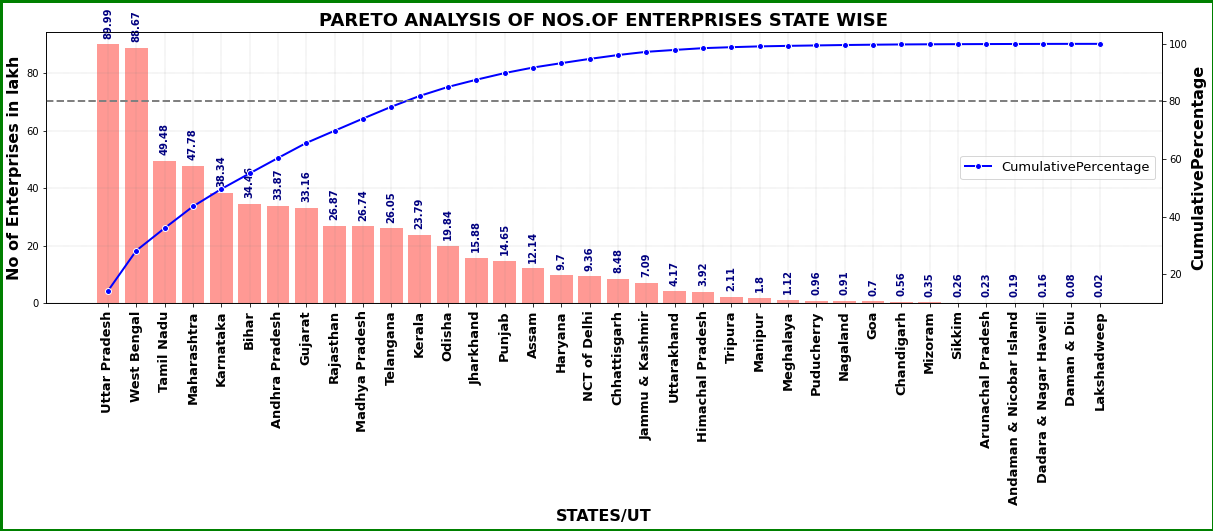

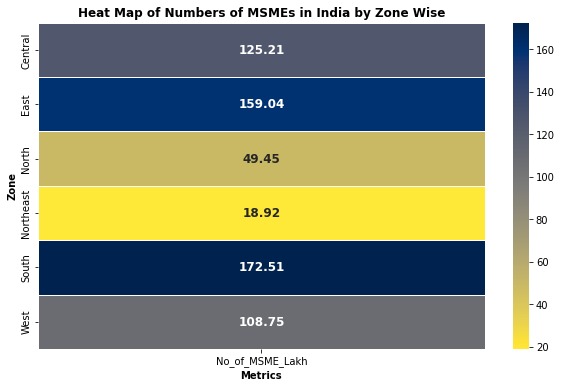

In [46]:
#Pareto Analysis of No. of MSME Enterprises (in Lakh)
No_MSME_in_Lakh=State_wise_male_Female[["States/UT","No_of_MSME_Lakh","Zone"]].sort_values(by="No_of_MSME_Lakh",ascending=False)
figure,ax4=plt.subplots(figsize=(20,5),facecolor='w', edgecolor='g',linewidth=5)
plt.grid(True, color='gray', linestyle='--', linewidth=0.2,zorder=0)
plt.xticks(rotation=90,fontweight='bold', fontsize=13)

ax4.bar(No_MSME_in_Lakh["States/UT"],No_MSME_in_Lakh["No_of_MSME_Lakh"],color="C0")
for i,v in enumerate(No_MSME_in_Lakh["No_of_MSME_Lakh"]):
    ax4.annotate(str(v), xy=(i, v+2), ha='center', va='bottom',fontweight='bold', fontsize=10,color='navy',rotation=90)
plt.xlabel("STATES/UT",fontsize=16,fontweight='bold')
plt.ylabel("No of Enterprises in lakh",fontsize=16,fontweight='bold')
plt.title('PARETO ANALYSIS OF NOS.OF ENTERPRISES STATE WISE',fontweight='bold', fontsize=18,color='k')

Cumulative_Percentage = No_MSME_in_Lakh["No_of_MSME_Lakh"].cumsum() / No_MSME_in_Lakh["No_of_MSME_Lakh"].sum() * 100
ax5=ax4.twinx()
ax5.plot(No_MSME_in_Lakh["States/UT"],Cumulative_Percentage,c='b',marker='o', 
         linewidth=2, markersize=6,markeredgecolor='w',markeredgewidth=1,label='CumulativePercentage')
ax5.set_ylabel('CumulativePercentage',fontsize=16,fontweight='bold',c='k')
ax5.axhline(80, color='gray', linestyle='--',linewidth=2)

plt.legend(fontsize=13,loc='right')
plt.show()

#Heat Map Analysis of No. of MSME Enterprises (in Lakh) Zone Wise

pivot_table = No_MSME_in_Lakh.groupby("Zone")["No_of_MSME_Lakh"].sum().to_frame() # Create a pivot table to aggregate data by Zone

# Plot heatmap
plt.figure(figsize=(10, 6),facecolor='w')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="cividis_r", linewidths=0.7,annot_kws={"size": 12, "weight": "bold"})
plt.title('Heat Map of Numbers of MSMEs in India by Zone Wise',fontweight='bold')
plt.xlabel('Metrics',fontweight='bold')
plt.ylabel('Zone',fontweight='bold')
plt.show()


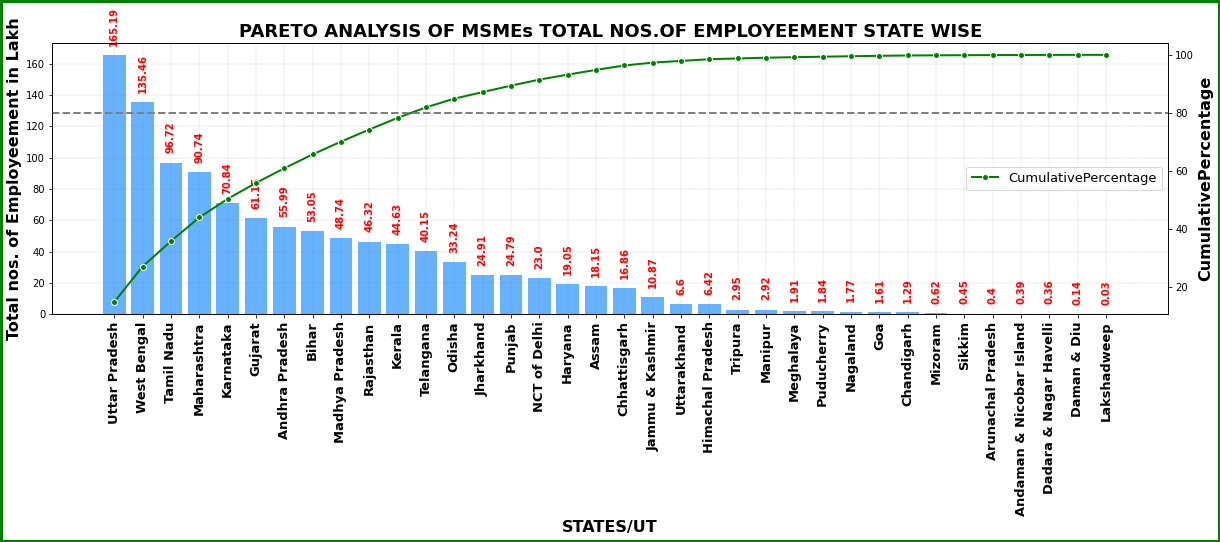

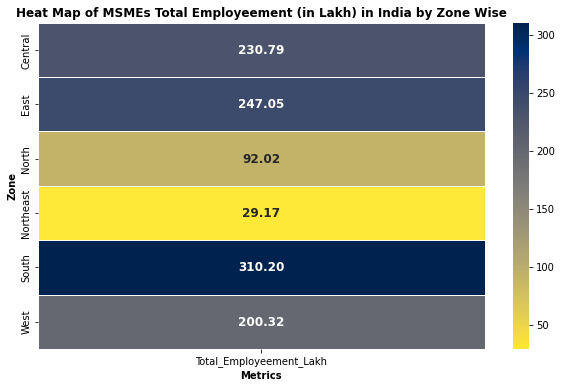

In [47]:
#Pareto Analysis of MSMEs Total Employeement (in Lakh)
Total_Employeement_Lakh=State_wise_male_Female[["States/UT","Total_Employeement_Lakh","Zone"]].sort_values(by="Total_Employeement_Lakh",ascending=False)
figure,ax4=plt.subplots(figsize=(20,5),facecolor='w', edgecolor='g',linewidth=5)
plt.grid(True, color='gray', linestyle='--', linewidth=0.2,zorder=0)
plt.xticks(rotation=90,fontweight='bold', fontsize=13)

ax4.bar(Total_Employeement_Lakh["States/UT"],Total_Employeement_Lakh["Total_Employeement_Lakh"],color="C1")
for i,v in enumerate(round(Total_Employeement_Lakh["Total_Employeement_Lakh"],2)):
    ax4.annotate(str(v), xy=(i, v+6), ha='center', va='bottom',fontweight='bold', fontsize=10,color='r',rotation=90)
plt.xlabel("STATES/UT",fontsize=16,fontweight='bold')
plt.ylabel("Total nos. of Employeement in Lakh",fontsize=16,fontweight='bold')
plt.title('PARETO ANALYSIS OF MSMEs TOTAL NOS.OF EMPLOYEEMENT STATE WISE',fontweight='bold', fontsize=18,color='k')

Cumulative_Percentage = Total_Employeement_Lakh["Total_Employeement_Lakh"].cumsum() / Total_Employeement_Lakh["Total_Employeement_Lakh"].sum() * 100
ax5=ax4.twinx()
ax5.plot(Total_Employeement_Lakh["States/UT"],Cumulative_Percentage,c='g',marker='o', 
         linewidth=2, markersize=6,markeredgecolor='w',markeredgewidth=1,label='CumulativePercentage')
ax5.set_ylabel('CumulativePercentage',fontsize=16,fontweight='bold',c='k')
ax5.axhline(80, color='gray', linestyle='--',linewidth=2)

plt.legend(fontsize=13,loc='right')
plt.show()

#Heat Map Analysis of No. of MSME Enterprises (in Lakh) Zone Wise

pivot_table = Total_Employeement_Lakh.groupby("Zone")["Total_Employeement_Lakh"].sum().to_frame() # Createing a pivot table to aggregate data by Zone

# Plot heatmap
plt.figure(figsize=(10, 6),facecolor='w')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="cividis_r", linewidths=0.7,annot_kws={"size": 12, "weight": "bold"})
plt.title('Heat Map of MSMEs Total Employeement (in Lakh) in India by Zone Wise',fontweight='bold')
plt.xlabel('Metrics',fontweight='bold')
plt.ylabel('Zone',fontweight='bold')
plt.show()


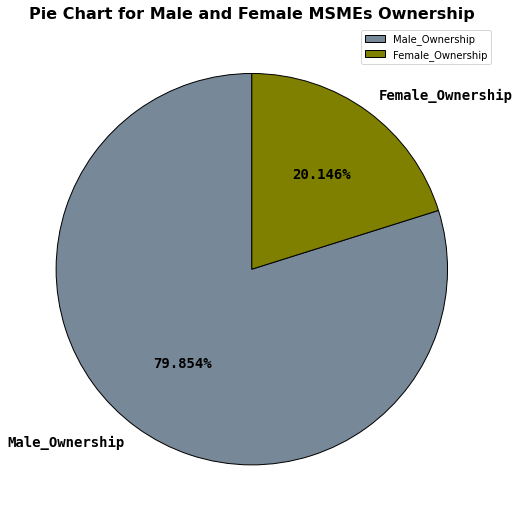

In [48]:
#Pie Chart for Male and Female MSMEs Ownership
plt.figure(figsize=(25,9),facecolor='w')
plt.pie([State_wise_male_Female['Male_Owner_Lakh'].sum(),State_wise_male_Female['Female_Owner_Lakh'].sum()],labels=["Male_Ownership","Female_Ownership"],colors=mf.randomcol(len(State_Data.iloc[:,7:].columns[0:2])),autopct='%1.3f%%',startangle=90,textprops={'family': 'monospace','fontsize': 14, 'fontweight': 'bold'},wedgeprops={'edgecolor': 'black'})
plt.title('Pie Chart for Male and Female MSMEs Ownership',fontdict={'family': 'sans-serif','fontsize': 16,'fontweight': 'bold'})
plt.legend()
plt.show()

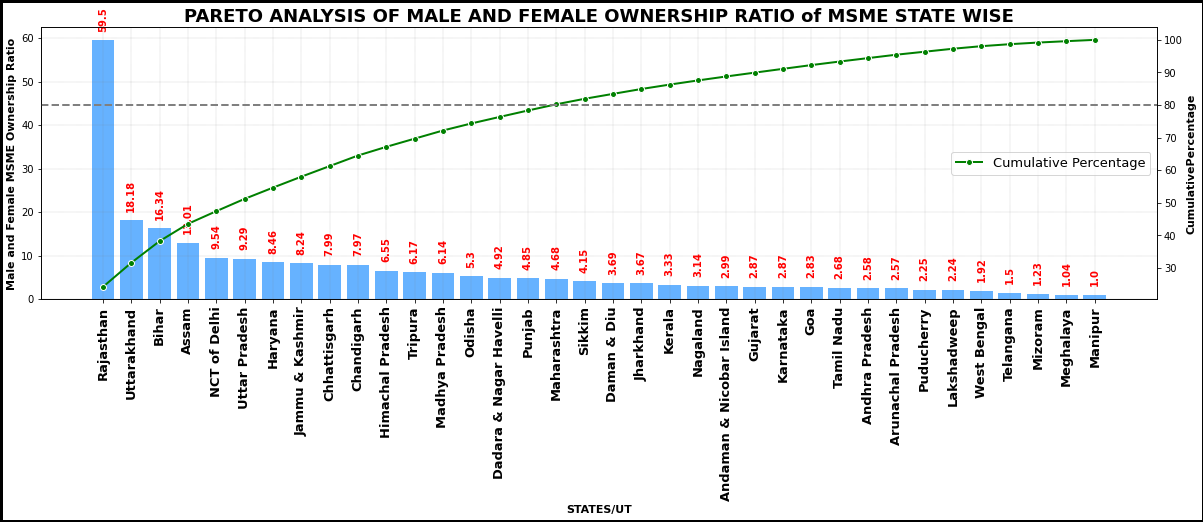

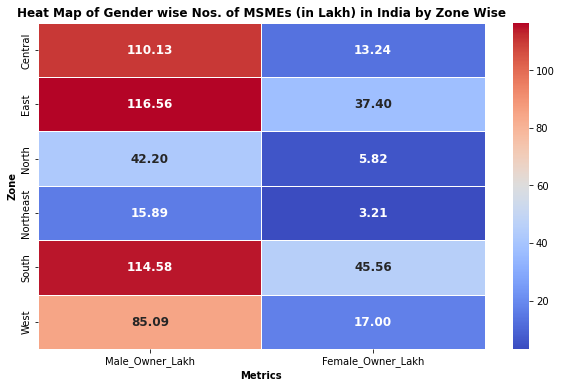

In [49]:
#PARETO ANALYSIS OF MALE AND FEMALE OWNERSHIP RATIO of MSME STATE WISE
State_wise_male_Female["MF_OWNER_RATIO"]=State_wise_male_Female['Male_Owner_Lakh']/State_wise_male_Female['Female_Owner_Lakh']
MSME_MF_ENTP=State_wise_male_Female[["States/UT","MF_OWNER_RATIO","Male_Owner_Lakh","Female_Owner_Lakh","Zone"]].sort_values(by="MF_OWNER_RATIO",ascending=False)
figure,ax4=plt.subplots(figsize=(20,5),facecolor='w', edgecolor='k',linewidth=5)
plt.grid(True, color='gray', linestyle='--', linewidth=0.2,zorder=0)
plt.xticks(rotation=90,fontweight='bold', fontsize=13)

ax4.bar(MSME_MF_ENTP['States/UT'],MSME_MF_ENTP['MF_OWNER_RATIO'],color="C1")
for i,v in enumerate(round(MSME_MF_ENTP['MF_OWNER_RATIO'],2)):
    ax4.annotate(str(v), xy=(i, v+2), ha='center', va='bottom',fontweight='bold', fontsize=10,color='r',rotation=90)
plt.xlabel("STATES/UT",fontsize=11,fontweight='bold')
plt.ylabel("Male and Female MSME Ownership Ratio",fontsize=11,fontweight='bold')
plt.title('PARETO ANALYSIS OF MALE AND FEMALE OWNERSHIP RATIO of MSME STATE WISE',fontweight='bold', fontsize=18,color='k')

Cumulative_Percentage = MSME_MF_ENTP['MF_OWNER_RATIO'].cumsum() / MSME_MF_ENTP['MF_OWNER_RATIO'].sum() * 100
ax5=ax4.twinx()
ax5.plot(MSME_MF_ENTP["States/UT"],Cumulative_Percentage,c='g',marker='o', 
         linewidth=2, markersize=6,markeredgecolor='w',markeredgewidth=1,label='Cumulative Percentage')
ax5.set_ylabel('CumulativePercentage',fontsize=11,fontweight='bold',c='k')
ax5.axhline(80, color='gray', linestyle='--',linewidth=2)

plt.legend(fontsize=13,loc='right')
plt.show()

#Heat Map Analysis of No. of MSME Enterprises (in Lakh) Zone Wise

pivot_table = MSME_MF_ENTP.groupby("Zone")[["Male_Owner_Lakh","Female_Owner_Lakh"]].sum() # Createing a pivot table to aggregate data by Zone

# Plot heatmap
plt.figure(figsize=(10, 6),facecolor='w')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.7,annot_kws={"size": 12, "weight": "bold"})
plt.title('Heat Map of Gender wise Nos. of MSMEs (in Lakh) in India by Zone Wise',fontweight='bold')
plt.xlabel('Metrics',fontweight='bold')
plt.ylabel('Zone',fontweight='bold')
plt.show()


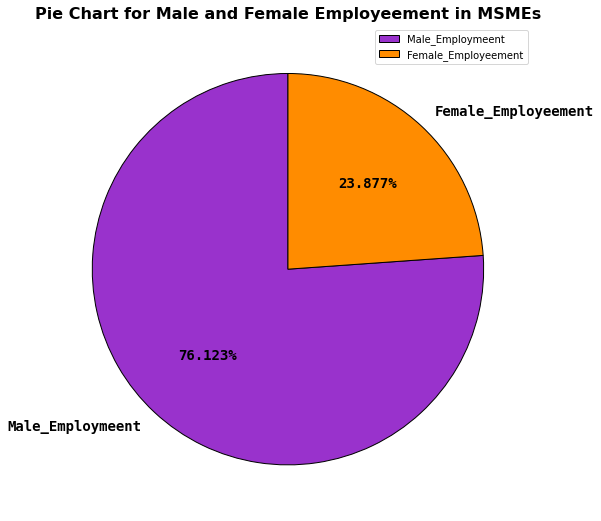

In [50]:
#Pie Chart for Male and Female Employeement in MSMEs 
plt.figure(figsize=(25,9),facecolor='w')
plt.pie([State_wise_male_Female['Employeement_Male_Lakh'].sum(),State_wise_male_Female['Employeement_Female_Lakh'].sum()],labels=["Male_Employmeent","Female_Employeement"],colors=mf.randomcol(len(State_Data.iloc[:,7:].columns[0:2])),autopct='%1.3f%%',startangle=90,textprops={'family': 'monospace','fontsize': 14, 'fontweight': 'bold'},wedgeprops={'edgecolor': 'black'})
plt.title('Pie Chart for Male and Female Employeement in MSMEs',fontdict={'family': 'sans-serif','fontsize': 16,'fontweight': 'bold'})
plt.legend()
plt.show()

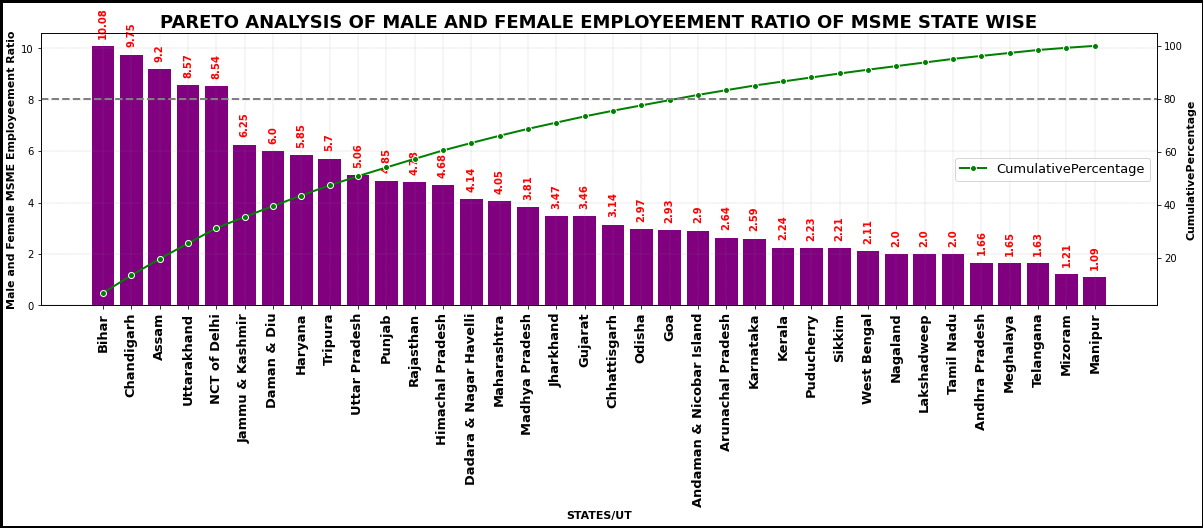

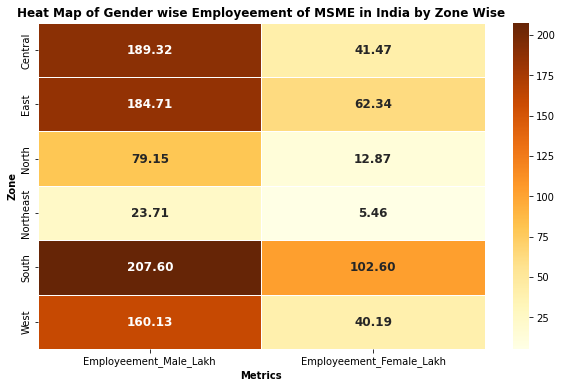

In [51]:
#PARETO ANALYSIS OF MALE AND FEMALE EMPLOYEEMENT RATIO OF MSME STATE WISE
State_wise_male_Female["MF_EMPLOY_RATIO"]=State_wise_male_Female['Employeement_Male_Lakh']/State_wise_male_Female['Employeement_Female_Lakh']
MSME_MF_EMPLOY=State_wise_male_Female[["States/UT","MF_EMPLOY_RATIO","Employeement_Female_Lakh","Employeement_Male_Lakh","Zone"]].sort_values(by="MF_EMPLOY_RATIO",ascending=False)
figure,ax4=plt.subplots(figsize=(20,5),facecolor='w', edgecolor='k',linewidth=5)
plt.grid(True, color='gray', linestyle='--', linewidth=0.2,zorder=0)
plt.xticks(rotation=90,fontweight='bold', fontsize=13)

ax4.bar(MSME_MF_EMPLOY['States/UT'],MSME_MF_EMPLOY['MF_EMPLOY_RATIO'],color="purple")
for i,v in enumerate(round(MSME_MF_EMPLOY['MF_EMPLOY_RATIO'],2)):
    ax4.annotate(str(v), xy=(i, v+0.3), ha='center', va='bottom',fontweight='bold', fontsize=10,color='r',rotation=90)
plt.xlabel("STATES/UT",fontsize=11,fontweight='bold')
plt.ylabel("Male and Female MSME Employeement Ratio",fontsize=11,fontweight='bold')
plt.title('PARETO ANALYSIS OF MALE AND FEMALE EMPLOYEEMENT RATIO OF MSME STATE WISE',fontweight='bold', fontsize=18,color='k')

Cumulative_Percentage = MSME_MF_EMPLOY['MF_EMPLOY_RATIO'].cumsum() / MSME_MF_EMPLOY['MF_EMPLOY_RATIO'].sum() * 100
ax5=ax4.twinx()
ax5.plot(MSME_MF_EMPLOY["States/UT"],Cumulative_Percentage,c='g',marker='o', 
         linewidth=2, markersize=6,markeredgecolor='w',markeredgewidth=1,label='CumulativePercentage')
ax5.set_ylabel('CumulativePercentage',fontsize=11,fontweight='bold',c='k')
ax5.axhline(80, color='gray', linestyle='--',linewidth=2)

plt.legend(fontsize=13,loc='right')
plt.show()

#Heat Map Analysis of No. of MSME Enterprises (in Lakh) Zone Wise

pivot_table = MSME_MF_EMPLOY.groupby("Zone")[["Employeement_Male_Lakh","Employeement_Female_Lakh"]].sum() # Createing a pivot table to aggregate data by Zone

# Plot heatmap
plt.figure(figsize=(10, 6),facecolor='w')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlOrBr", linewidths=0.7,annot_kws={"size": 12, "weight": "bold"})
plt.title('Heat Map of Gender wise Employeement of MSME in India by Zone Wise',fontweight='bold')
plt.xlabel('Metrics',fontweight='bold')
plt.ylabel('Zone',fontweight='bold')
plt.show()


### EDA  OF FOURTH CENSUS OF MSME 2006-2009

In [52]:
MSME_4TH_CENSUS.head(15)

State/UT  Number of Enterprises (Lakhs)  Employment (Lakhs)  \
0   Jammu and Kashmir                          1.180               2.170   
1    Himachal Pradesh                          1.600               2.270   
2              Punjab                          9.660              14.160   
3          Chandigarh                          0.280               0.580   
4         Uttarakhand                          2.000               3.620   
5             Haryana                          4.870               8.410   
6               Delhi                          1.750               5.940   
7           Rajasthan                          9.140              15.000   
8       Uttar Pradesh                         22.340              51.760   
9               Bihar                          7.480              15.970   
10             Sikkim                          0.060               0.560   
11  Arunachal Pradesh                          0.250               0.820   
12           Nagaland                          0.160               1.000   
13            Manipur                          0.440               1.380   
14            Mizoram                          0.100               0.300   

    Original Value of Plant & Machinery (Value In Crore)  \
0                                             407.360      
1                                            1541.670      
2                                            3704.740      
3                                              73.590      
4                                            2012.400      
5                                            2244.900      
6                                            1555.410      
7                                            3044.070      
8                                            8409.840      
9                                            2321.930      
10                                             14.800      
11                                            204.350      
12                                            201.230      
13                                            173.830      
14                                             59.190      

    Market Value of Fixed Assets (Value In Crore)  \
0                                        1110.360   
1                                        2513.530   
2                                       14261.900   
3                                         182.130   
4                                        2578.520   
5                                        7028.270   
6                                        7700.290   
7                                        9294.170   
8                                       22495.020   
9                                        4730.990   
10                                         44.340   
11                                        393.700   
12                                        555.340   
13                                        549.270   
14                                        106.190   

    Gross Output (Value In Crore)  Total Input (Value In Crore)  \
0                        1518.610                       751.790   
1                        5460.910                      4134.520   
2                       19525.780                     10438.920   
3                         204.100                        66.420   
4                        2817.280                      1351.790   
5                        9435.710                      3784.530   
6                       10201.240                      6460.010   
7                       10602.200                      4208.630   
8                       37024.520                     15958.030   
9                       12047.770                      6557.930   
10                        138.390                        46.200   
11                        864.520                       316.100   
12                       1448.990                       719.060   
13                        894.900               

Pearson Correlation: 0.98, P-value: 0.000
Reject the null hypothesis (H0). There is a significant correlation between the number of enterprises and employment.
 

+-------+---------------------------------+----------------------+
|       |   Number of Enterprises (Lakhs) |   Employment (Lakhs) |
+=======+=================================+======================+
| count |                          35     |               35     |
+-------+---------------------------------+----------------------+
| mean  |                           5.679 |               11.681 |
+-------+---------------------------------+----------------------+
| std   |                           6.758 |               15.056 |
+-------+---------------------------------+----------------------+
| min   |                           0.01  |                0.03  |
+-------+---------------------------------+----------------------+
| 25%   |                           0.255 |                0.7   |
+-------+------------------------

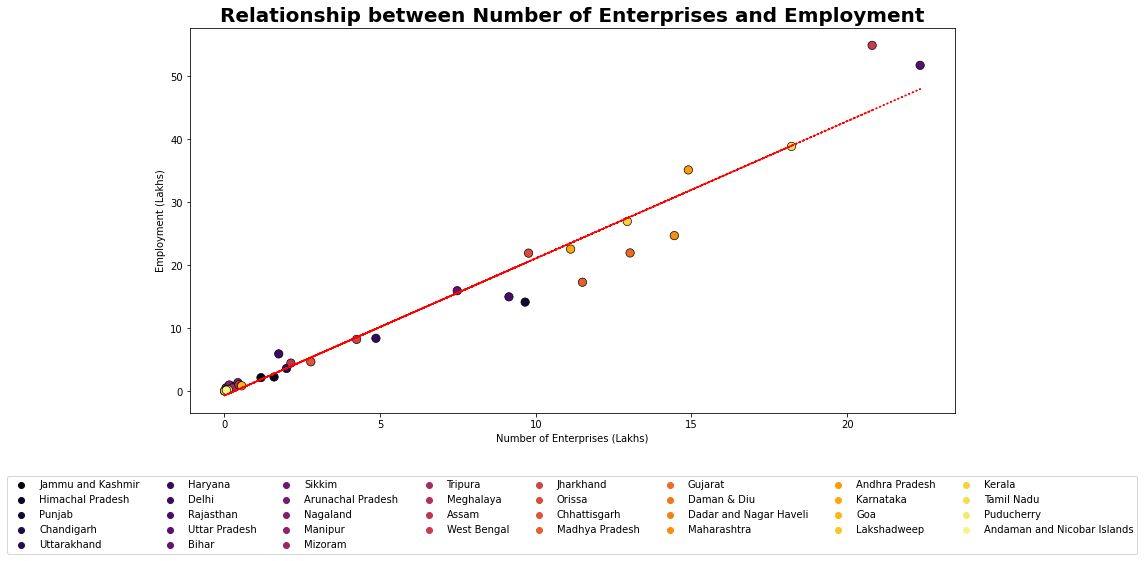

In [53]:
# Linear Co relation Analyis
correlation, p_value = stats.pearsonr(MSME_4TH_CENSUS["Number of Enterprises (Lakhs)"], MSME_4TH_CENSUS["Employment (Lakhs)"])
print(f"Pearson Correlation: {correlation:.2f}, P-value: {p_value:.3f}")
# Hypothesis test conclusion
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a significant correlation between the number of enterprises and employment.\n \n")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant correlation between the number of enterprises and employment.\n\n")
# Descriptive statistics
print(tab(round(MSME_4TH_CENSUS[['Number of Enterprises (Lakhs)','Employment (Lakhs)']].describe(),3),headers='keys',tablefmt='grid'))


# Scatter plot
plt.figure(figsize=(15, 8), facecolor='w')
sns.scatterplot(x=MSME_4TH_CENSUS["Number of Enterprises (Lakhs)"], 
                y=MSME_4TH_CENSUS["Employment (Lakhs)"], 
                hue=MSME_4TH_CENSUS["State/UT"], 
                palette="inferno",s=70,edgecolor='k',alpha=1)

# Add trend line
z = np.polyfit(MSME_4TH_CENSUS["Number of Enterprises (Lakhs)"], MSME_4TH_CENSUS["Employment (Lakhs)"], 1)
p = np.poly1d(z)
plt.plot(MSME_4TH_CENSUS["Number of Enterprises (Lakhs)"], p(MSME_4TH_CENSUS["Number of Enterprises (Lakhs)"]), "r:")

# Title and labels
plt.title("Relationship between Number of Enterprises and Employment",fontweight='bold',fontsize='20')
plt.xlabel("Number of Enterprises (Lakhs)")
plt.ylabel("Employment (Lakhs)")

# Modify the legend: Horizontal orientation and smaller font size
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='10', ncol=8)

# Adjust layout
plt.tight_layout()
plt.show()


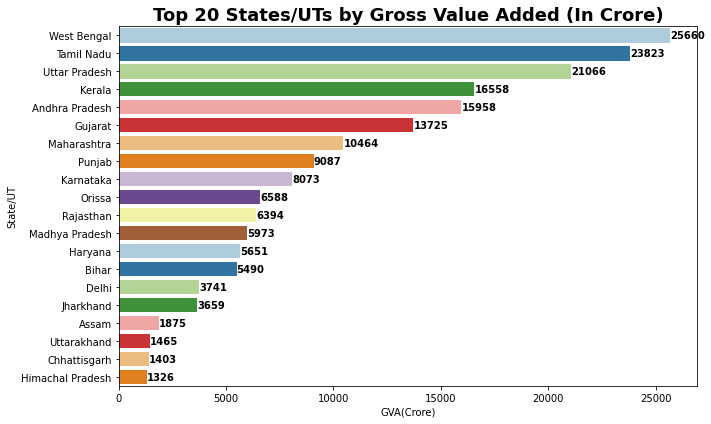

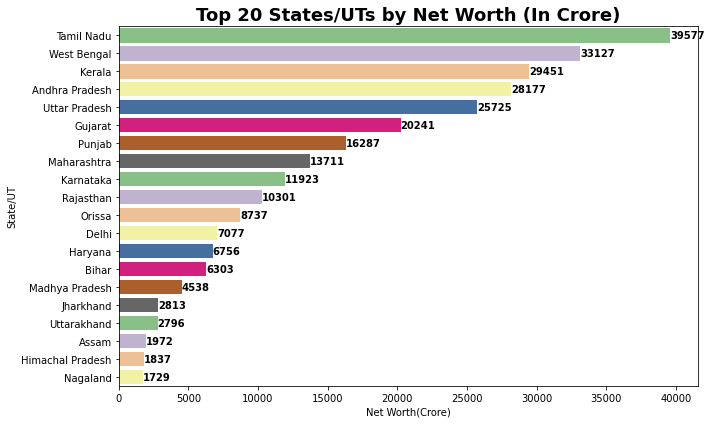

In [54]:
# Bar plot of the top 20 states/UTs by Gross Value Added-In Crore
Top_20_Gross_Value_Added  = MSME_4TH_CENSUS.nlargest(20, "Gross Value Added ( Value In Crore )")
plt.figure(figsize=(10, 6),facecolor='w')
sns.barplot(data=Top_20_Gross_Value_Added, x="Gross Value Added ( Value In Crore )", y="State/UT", palette="Paired")

# Add labels to bars
for index, value in enumerate(Top_20_Gross_Value_Added["Gross Value Added ( Value In Crore )"]):
    plt.text(value, index, f'{value:.0f}', va='center',fontweight='bold')

plt.title("Top 20 States/UTs by Gross Value Added (In Crore)", fontweight='bold',fontsize='18')
plt.xlabel("GVA(Crore)")
plt.ylabel("State/UT")
plt.tight_layout()

# Bar plot of the top 20 states/UTs by Gross Output
Top_20_Net_Worth  = MSME_4TH_CENSUS.nlargest(20, "Net Worth (Value In Crore)")
plt.figure(figsize=(10, 6),facecolor='w')
sns.barplot(data=Top_20_Net_Worth, x="Net Worth (Value In Crore)", y="State/UT", palette="Accent")

# Add labels to bars
for index, value in enumerate(Top_20_Net_Worth["Net Worth (Value In Crore)"]):
    plt.text(value, index, f'{value:.0f}', va='center',fontweight='bold')

plt.title("Top 20 States/UTs by Net Worth (In Crore)", fontweight='bold',fontsize='18')
plt.xlabel("Net Worth(Crore)")
plt.ylabel("State/UT")
plt.tight_layout()


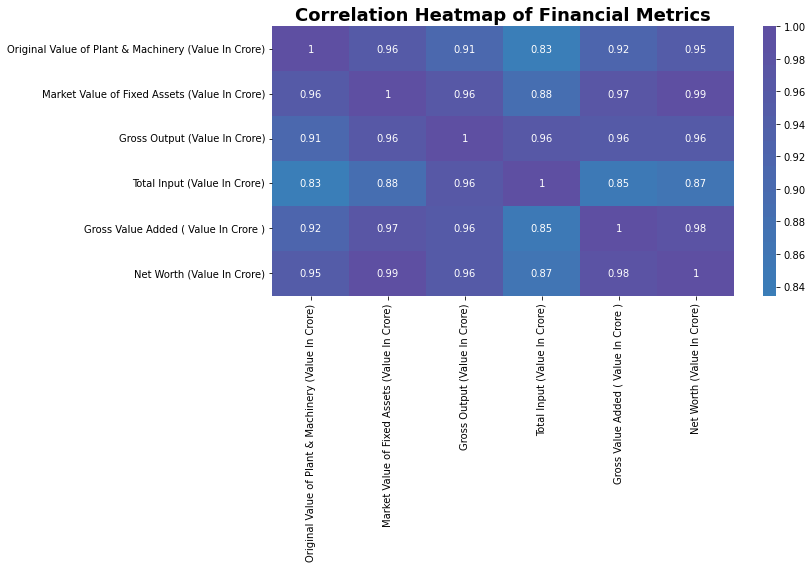

In [56]:
# Correlation heatmap of key financial metrics
plt.figure(figsize=(12, 8),facecolor='w')
financial_cols = ["Original Value of Plant & Machinery (Crore)","Market Value of Fixed Assets (Crore)","Gross Output (Crore)","Total Input (Crore)","Gross Value Added (Crore)", "Net Worth (Crore)"]
sns.heatmap(MSME_4TH_CENSUS.iloc[:,3:9].corr(), annot=True, cmap='Spectral', center=0)
plt.title("Correlation Heatmap of Financial Metrics",fontweight='bold',fontsize='18')
plt.tight_layout()

In [58]:
import statsmodels.api as sm

# Define the independent (X) and dependent (Y) variables
X = MSME_4TH_CENSUS["Original Value of Plant & Machinery (Value In Crore)"]
Y = MSME_4TH_CENSUS["Gross Value Added ( Value In Crore )"]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())


                                     OLS Regression Results                                     
Dep. Variable:     Gross Value Added ( Value In Crore )   R-squared:                       0.847
Model:                                              OLS   Adj. R-squared:                  0.842
Method:                                   Least Squares   F-statistic:                     182.0
Date:                                  Thu, 24 Oct 2024   Prob (F-statistic):           5.53e-15
Time:                                          03:27:20   Log-Likelihood:                -327.65
No. Observations:                                    35   AIC:                             659.3
Df Residuals:                                        33   BIC:                             662.4
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                              

+----+------------+----------------------------------+-------------------------+-------------------+-------------------------+
|    | Zone       |   Initial_Investment_Per_Entp_Rs |   Employeement_Per_Entp |   GVA_Per_Entp_Rs |   Net_Worth_Per_Entp_Rs |
+====+============+==================================+=========================+===================+=========================+
|  3 | North-East |                           136857 |                 250     |          113834   |                157803   |
+----+------------+----------------------------------+-------------------------+-------------------+-------------------------+
|  4 | South      |                           237131 |                 216.243 |          112647   |                190543   |
+----+------------+----------------------------------+-------------------------+-------------------+-------------------------+
|  1 | East       |                           131678 |                 239.943 |           97942.2 |           

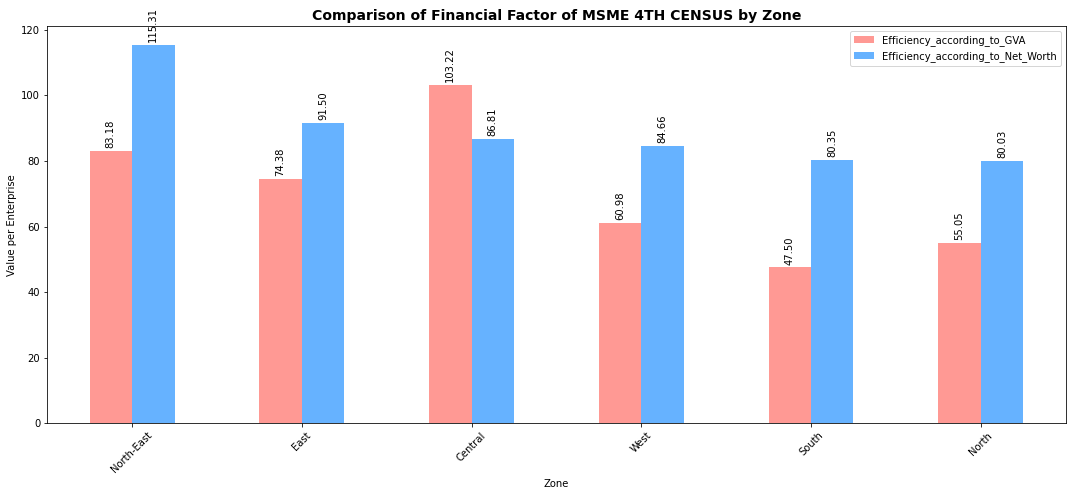

In [100]:
Pivot_Table=MSME_4TH_CENSUS.groupby(['Zone'])[MSME_4TH_CENSUS.columns.drop(["State/UT","Zone"])].sum()
Pivot_Table.reset_index(inplace=True)
#print(Pivot_Table)
Zone_Per_Entp_Data={"Zone":Pivot_Table["Zone"],"Initial_Investment_Per_Entp_Rs":(Pivot_Table["Original Value of Plant & Machinery (Value In Crore)"]+Pivot_Table["Market Value of Fixed Assets (Value In Crore)"])/(Pivot_Table["Number of Enterprises (Lakhs)"]/100),
                      "Employeement_Per_Entp":Pivot_Table["Employment (Lakhs)"]/(Pivot_Table["Number of Enterprises (Lakhs)"]/100),
                     "GVA_Per_Entp_Rs":Pivot_Table["Gross Value Added ( Value In Crore )"]/(Pivot_Table["Number of Enterprises (Lakhs)"]/100),
                     "Net_Worth_Per_Entp_Rs":Pivot_Table["Net Worth (Value In Crore)"]/(Pivot_Table["Number of Enterprises (Lakhs)"]/100)}
Zone_Values_Per_Entp=pd.DataFrame(Zone_Per_Entp_Data).sort_values(by="GVA_Per_Entp_Rs",ascending = False)
print(tab(Zone_Values_Per_Entp,headers='keys',tablefmt='grid'))
Zone_MSME_Outcome_Efficiency = {
    "ZONE": Zone_Values_Per_Entp["Zone"],
    "Efficiency_according_to_GVA": Zone_Values_Per_Entp["GVA_Per_Entp_Rs"] / Zone_Values_Per_Entp["Initial_Investment_Per_Entp_Rs"] * 100,
    "Efficiency_according_to_Net_Worth": Zone_Values_Per_Entp["Net_Worth_Per_Entp_Rs"] / Zone_Values_Per_Entp["Initial_Investment_Per_Entp_Rs"] * 100
}

Zone_MSMEs_Outcome_Efficiency = pd.DataFrame(Zone_MSME_Outcome_Efficiency).sort_values(by="Efficiency_according_to_Net_Worth", ascending=False)

# Plotting the Bar Graph
fig, ax = plt.subplots(figsize=(15, 7), facecolor='w')

# Plot each column on the y-axis
bars = Zone_MSMEs_Outcome_Efficiency.plot(x='ZONE', y=["Efficiency_according_to_GVA","Efficiency_according_to_Net_Worth"],kind='bar', ax=ax)

# Add title and labels
plt.title('Comparison of Financial Factor of MSME 4TH CENSUS by Zone',fontweight='bold',fontsize='14')
plt.ylabel('Value per Enterprise')
plt.xlabel('Zone')
plt.xticks(rotation=45)

# Add labels to each bar
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Format the height to two decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position the label at the top of the bar
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',rotation=90)

# Show the plot
plt.tight_layout()
plt.show()